<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/blob/master/03_INTERVALOS_DE_CONFIANZA_Y_TEST_DIFERENCIACION_DE_MEDIAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

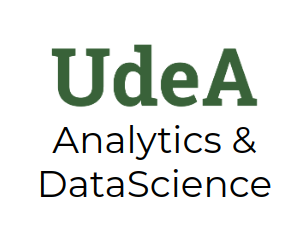

In [ ]:
Image("local/imgs/udea-datascience.png")

# **Intervalos de confianza y test de diferenciación de medias**

## Desarrollado por: Ph.D. Javier Fernando Botía Valderrama

## Universidad de Antioquia

# Distribuciones Especiales

**Recordatorio: Distribución Gamma ($\Gamma$):**

La función de densidad de probabilidad Gamma es una distribución para variables aleatorias *np-negativas*, donde tiene dos parámetros $\lambda > 0$ y $\alpha > 0$, y una función gamma $\Gamma(z)$, la distribución de densidad de probabilidad $f(x)$ está dado por:

$$f(x) = \begin{cases} \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha - 1} & Si\,\, x \geq 0 \\ 0 & Si\,\, x < 0 \end{cases}$$

donde $\Gamma(\alpha)$ es una función Gamma que normaliza la función de densidad de probabilidad para asegurar que $0 \leq f(x) \leq 1$.

## Distribución exponencial

Teniendo en cuenta la distribución Gamma, la distribución exponencial es un caso especial con $\alpha = 1$ tal que su función de densidad de probabilidad está dado por:

$$f(x) = \begin{cases} \frac{\lambda}{\Gamma(1)} \exp(-\lambda x) & Si\,\, x \geq 0 \\ 0 & Si\,\, x < 0 \end{cases}$$

Una característica particular es que $\Gamma(1) = 0! = 1$, y por consiguiente para $x \geq 0$ se puede aproximar a $\lambda \exp(-\lambda x)$.

Por lo general, la media y la varianza de esta distribución están dados por:

$$\mu = \frac{1}{\lambda}$$
$$\sigma^2 = \frac{1}{\lambda^2}$$

Se puede observar que para ambos estadísticos, si $\lambda$ es más grande entonces la media y la varianza disminuira cada vez más rápido. Por otra parte, el sesgo y la curtosis de está distribución están dados por valores constantes, $s = 2$ y $\beta_2 = 6$.

Veamos un ejemplo práctico de esta distribución:

Media_1 = 1.00 Media_2 = 0.50 Media_3 = 0.25
Varianza_1 = 1.00 Varianza_2 = 0.25 Varianza_3 = 0.06
Sesgo_1 = 2.00 Sesgo_2 = 2.00 Sesgo_3 = 2.00
Curtosis_1 = 6.00 Curtosis_2 = 6.00 Curtosis_3 = 6.00


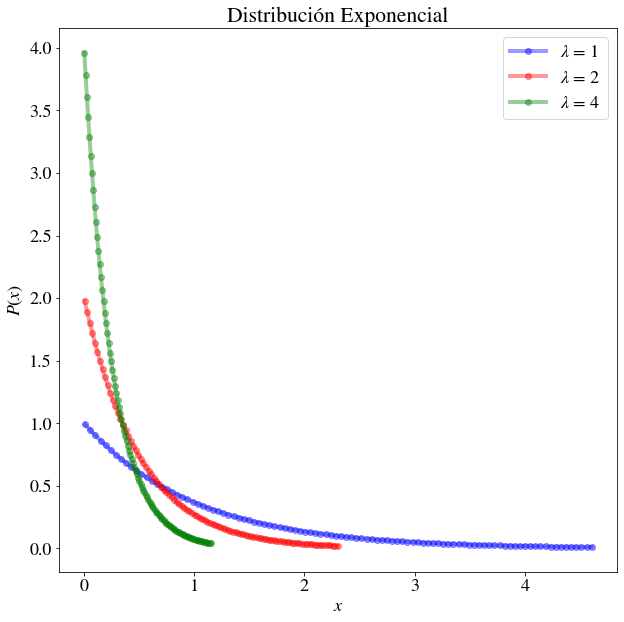

In [1]:
from scipy.stats import expon # Distribución exponencial
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

lamda_1, lamda_2, lamda_3 = 1, 2, 4

sc_1 = 1/lamda_1 
sc_2 = 1/lamda_2
sc_3 = 1/lamda_3

media_1, varianza_1, sesgo_1, kurtosis_1 = expon.stats(scale = sc_1, moments='mvsk')
media_2, varianza_2, sesgo_2, kurtosis_2 = expon.stats(scale = sc_2, moments='mvsk')
media_3, varianza_3, sesgo_3, kurtosis_3 = expon.stats(scale = sc_3, moments='mvsk')

print("Media_1 = {:.2f}".format(media_1), "Media_2 = {:.2f}".format(media_2), "Media_3 = {:.2f}".format(media_3))
print("Varianza_1 = {:.2f}".format(varianza_1), "Varianza_2 = {:.2f}".format(varianza_2), "Varianza_3 = {:.2f}".format(varianza_3))
print("Sesgo_1 = {:.2f}".format(sesgo_1), "Sesgo_2 = {:.2f}".format(sesgo_2), "Sesgo_3 = {:.2f}".format(sesgo_3))
print("Curtosis_1 = {:.2f}".format(kurtosis_1), "Curtosis_2 = {:.2f}".format(kurtosis_2), "Curtosis_3 = {:.2f}".format(kurtosis_3))

x1 = np.linspace(expon.ppf(0.01, scale = sc_1), expon.ppf(0.99, scale = sc_1), 100)
x2 = np.linspace(expon.ppf(0.01, scale = sc_2), expon.ppf(0.99, scale = sc_2), 100)
x3 = np.linspace(expon.ppf(0.01, scale = sc_3), expon.ppf(0.99, scale = sc_3), 100)

P1 = expon.pdf(x1, scale = sc_1)
P2 = expon.pdf(x2, scale = sc_2)
P3 = expon.pdf(x3, scale = sc_3)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x1, P1,'-ob', lw = 4, alpha = 0.4, label = r'$\lambda$ = {:d}'.format(lamda_1))
pyplot.plot(x2, P2,'-or', lw = 4, alpha = 0.4, label = r'$\lambda$ = {:d}'.format(lamda_2))
pyplot.plot(x3, P3,'-og', lw = 4, alpha = 0.4, label = r'$\lambda$ = {:d}'.format(lamda_3))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(x)$') # Etiqueta del eje y  
pyplot.title('Distribución Exponencial') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

## Distribución chi-cuadrada

Recordando la distribución Gamma, la distribución chi-cuadrada es un caso especial de la distribución Gamma con $D$ grados de libertad para $\alpha = \frac{D}{2}$ y $\lambda = \frac{1}{2}$:

$$f(x) = \begin{cases} \frac{1}{2^{\left ( \frac{D}{2} \right )} \cdot \Gamma \left( \frac{D}{2}\right )}x^{\left ( \frac{D}{2} - 1 \right )} \exp \left (-\frac{x}{2} \right ) & Si\,\, x \geq 0 \\ 0 & Si\,\, x < 0 \end{cases}$$

La función de probabilidad $f(x)$ se llama **chi-cuadrada** con $D$ grados de libertad. Por notación, nosotros representaremos tal distribución como $X$ ~ $x^2_D$.

Por lo general, la media y la varianza de esta distribución están dados por las siguientes expresiones:

$$\mu = D$$

$$\sigma^2 = 2 \left ( \frac{D}{N} \right )$$

siendo $N$ el número de muestras u observaciones de $x$. Como pueden observar, la media depende del número de grados de libertad y la varianza depende de la razón entre el número de grados de libertad con respecto al número de muestras de los datos. Si $D$ es un valor fijo y $N$ es más grande, entonces la varianza disminuye.

Por otra parte, el sesgo y la curtosis de esta distribución son respectivamente: $s = \sqrt{8/D}$ y $\beta_2 = 12/D$. Obviamente, si $D$ es un valor grande, entonces el sesgo y la curtosis disminuye, haciendo que la función de densidad chi-cuadrada tenga una forma cada vez más achatada. 

Veamos un ejemplo práctico para conocer algunas características de esta distribución.

Media_1 = 10.00 Media_2 = 20.00 Media_3 = 50.00
Varianza_1 = 20.00 Varianza_2 = 40.00 Varianza_3 = 100.00
Sesgo_1 = 0.89 Sesgo_2 = 0.63 Sesgo_3 = 0.40
Curtosis_1 = 1.20 Curtosis_2 = 0.60 Curtosis_3 = 0.24


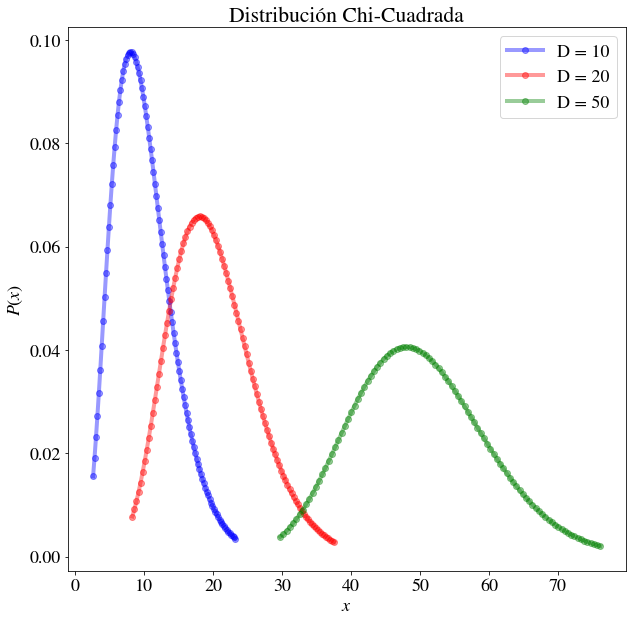

In [2]:
from scipy.stats import chi2 # Distribución chi-cuadrada
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

D1, D2, D3 = 10, 20, 50
media_1, varianza_1, sesgo_1, kurtosis_1 = chi2.stats(D1, moments='mvsk')
media_2, varianza_2, sesgo_2, kurtosis_2 = chi2.stats(D2, moments='mvsk')
media_3, varianza_3, sesgo_3, kurtosis_3 = chi2.stats(D3, moments='mvsk')

print("Media_1 = {:.2f}".format(media_1), "Media_2 = {:.2f}".format(media_2), "Media_3 = {:.2f}".format(media_3))
print("Varianza_1 = {:.2f}".format(varianza_1), "Varianza_2 = {:.2f}".format(varianza_2), "Varianza_3 = {:.2f}".format(varianza_3))
print("Sesgo_1 = {:.2f}".format(sesgo_1), "Sesgo_2 = {:.2f}".format(sesgo_2), "Sesgo_3 = {:.2f}".format(sesgo_3))
print("Curtosis_1 = {:.2f}".format(kurtosis_1), "Curtosis_2 = {:.2f}".format(kurtosis_2), "Curtosis_3 = {:.2f}".format(kurtosis_3))

x1 = np.linspace(chi2.ppf(0.01, D1), chi2.ppf(0.99, D1), 100)
x2 = np.linspace(chi2.ppf(0.01, D2), chi2.ppf(0.99, D2), 100)
x3 = np.linspace(chi2.ppf(0.01, D3), chi2.ppf(0.99, D3), 100)

P1 = chi2.pdf(x1, D1)
P2 = chi2.pdf(x2, D2)
P3 = chi2.pdf(x3, D3)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x1, P1,'-ob', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D1))
pyplot.plot(x2, P2,'-or', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D2))
pyplot.plot(x3, P3,'-og', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D3))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(x)$') # Etiqueta del eje y  
pyplot.title('Distribución Chi-Cuadrada') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

## Distribución Erlang

Recordando la distribución Gamma, la distribución chi-cuadrada es un caso especial de la distribución Gamma con $\alpha = D$.

$$f(x) = \begin{cases} \frac{\lambda^D}{\Gamma(D)}x^{(D -1)} \exp (-\lambda x) & Si\,\, x \geq 0 \\ 0 & Si\,\, x < 0 \end{cases}$$

donde $\Gamma(D) = (D - 1)!$.

La media y la varianza de la distribución Erlang están dados por:

$$\mu = \frac{D}{\lambda}$$

$$\sigma^2 = \frac{D}{\lambda^2}$$

Tanto la media como la varianza aumentan si $D$ es grande, siempre y cuando $\lambda$ tenga el mismo valor para toda la distribución. Por otra parte, el sesgo y la curtosis se expresan para esta distribución como:

$$s = \frac{2}{\sqrt{D}}$$

$$\beta_2 = \frac{6}{D}$$

Obviamente si $D$ es muy grande, el sesgo y la curtosis van a ser cada vez menor, lo cual se achata la función de densidad de distribución, tal y como se observó en la distribución Chi-Cuadrada.

Veamos un ejemplo de esta distribución de densidad de probabilidad.

Media_1 = 10.00; Media_2 = 20.00; Media_3 = 50.00
Varianza_1 = 10.00; Varianza_2 = 20.00; Varianza_3 = 50.00
Sesgo_1 = 0.63; Sesgo_2 = 0.45; Sesgo_3 = 0.28
Curtosis_1 = 0.60; Curtosis_2 = 0.30; Curtosis_3 = 0.12


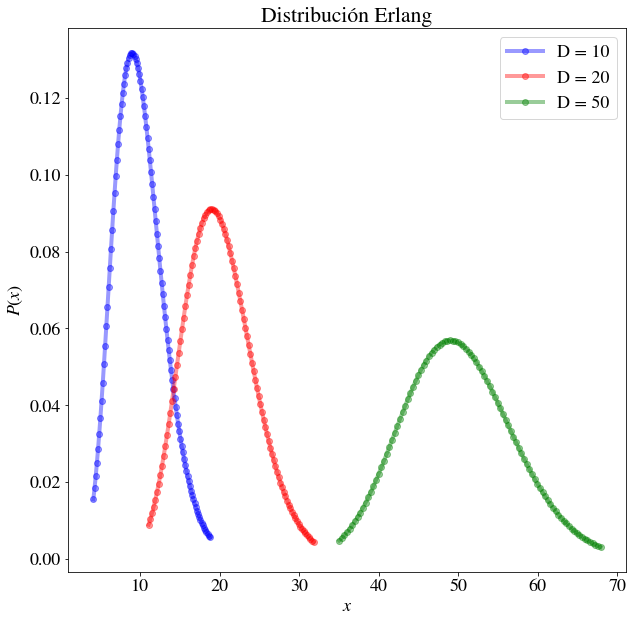

In [ ]:
from scipy.stats import erlang # Distribución Erlang
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

D1, D2, D3 = 10, 20, 50
media_1, varianza_1, sesgo_1, kurtosis_1 = erlang.stats(D1, moments='mvsk')
media_2, varianza_2, sesgo_2, kurtosis_2 = erlang.stats(D2, moments='mvsk')
media_3, varianza_3, sesgo_3, kurtosis_3 = erlang.stats(D3, moments='mvsk')

print("Media_1 = {:.2f};".format(media_1), "Media_2 = {:.2f};".format(media_2), "Media_3 = {:.2f}".format(media_3))
print("Varianza_1 = {:.2f};".format(varianza_1), "Varianza_2 = {:.2f};".format(varianza_2), "Varianza_3 = {:.2f}".format(varianza_3))
print("Sesgo_1 = {:.2f};".format(sesgo_1), "Sesgo_2 = {:.2f};".format(sesgo_2), "Sesgo_3 = {:.2f}".format(sesgo_3))
print("Curtosis_1 = {:.2f};".format(kurtosis_1), "Curtosis_2 = {:.2f};".format(kurtosis_2), "Curtosis_3 = {:.2f}".format(kurtosis_3))

x1 = np.linspace(erlang.ppf(0.01, D1), erlang.ppf(0.99, D1), 100)
x2 = np.linspace(erlang.ppf(0.01, D2), erlang.ppf(0.99, D2), 100)
x3 = np.linspace(erlang.ppf(0.01, D3), erlang.ppf(0.99, D3), 100)

P1 = erlang.pdf(x1, D1)
P2 = erlang.pdf(x2, D2)
P3 = erlang.pdf(x3, D3)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x1, P1,'-ob', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D1))
pyplot.plot(x2, P2,'-or', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D2))
pyplot.plot(x3, P3,'-og', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D3))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(x)$') # Etiqueta del eje y  
pyplot.title('Distribución Erlang') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

## Distribución t-student

La distribución t-student es una interpretación de la conjugada entre una una función de densidad de probabilidad Gaussiana (apriori) con una función de densidad de probabilidad Gamma. 

Incialmente, se define una distribución Gamma con dos parámetros $\alpha$ y $b$, el cual lo representamos como $Gam(\lambda\vert \alpha, b)$:

$$Gam(\lambda\vert \alpha, b) = \frac{1}{\Gamma(\alpha)}b^\alpha \lambda^{\alpha - 1} \exp(-b\lambda)$$

donde $\Gamma(\alpha)$ es la función Gamma que vimos en la unidad 1, $\lambda$ se llama como la **precisión** y $b$ es un parámetro de ajuste de la distribución. 

Considerando la anterior distribución y la distribución Gaussiana, se utiliza dos parámetros, $\nu = 2\alpha$ y $\lambda = \frac{\alpha}{b}$. De manera forma, la distribución t-student, $St(x\vert \mu, \lambda, \nu)$, se expresa como:

$$St(x\vert \mu, \lambda, \nu) = \frac{\Gamma \left( \frac{\nu}{2} + \frac{1}{2}\right )}{\Gamma \left (\frac{\nu}{2} \right)} \left (\frac{\lambda}{\pi\cdot \nu} \right)^{\frac{1}{2}} \left \lbrack 1 + \frac{\lambda (x - \mu)^2}{\nu} \right \rbrack^{-\frac{\nu}{2} - \frac{1}{2}}$$

El parámetro $\lambda$ se llama habitualmente como el **parámetro de precisión t-student** y el parámetro $\nu$ se llama **grados de libertad**. A diferencia de una distribución de densidad de probabilidad Gaussiana, la distribución t-student tiene una interesante propiedad llamada **robustez**, que significa que la distribución t-student es mucho menos sensible que la distribución Gaussiana cuando hay presencia de un conjunto de datos de tamaño pequeño (esta propiedad es interesante porque permite agrupar datos con presencia de datos arípicos u outliers de manera más eficiente, usando mezclas Gaussianas. Lo anterior es útil para tareas de aprendizaje no supervisado en machine learning). Otro detalle intersante de la robustez es su aplicabilidad en tareas de regresión, el cual es útil para obtener modelos robustos de regresión para hacer tareas de predicción. 

La media y la varianza de la distribución t-student se expresan como:

$$\mu = 0,\,\, Si\,\, \nu > 1$$
$$\sigma^2 = \frac{\nu}{\nu - 2},\,\, Si\,\, \nu > 2$$

Es importante mencionar que la media siempre se mantendrá en 0 si $\nu > 1$ porque para valores más pequeños, es decir $\nu \leq 1$, la media tiende a ser un valor indeterminado. Una interpretación similar se presenta con la varianza. 

Por otra parte, el sesgo y la curtosis de esta distribución se expresan como:

$$s = 0,\,\, Si\,\, \nu > 3$$
$$\beta_2 = \frac{6}{\nu - 4},\,\, Si\,\, \nu > 4$$

Observen que el sesgo siempre será 0 para $\nu > 3$ y la curtosis dependerá del grado de libertad que debe ser $\nu > 4$ para evitar valores indeterminados.

Veamos un ejemplo práctico de esta importante distribución.

Media_1 = 0.00; Media_2 = 0.00; Media_3 = 0.00; Media_4 = 0.00
Varianza_1 = 2.82; Varianza_2 = 1.25; Varianza_3 = 1.11; Varianza_4 = 1.06
Sesgo_1 = 0.00; Sesgo_2 = 0.00; Sesgo_3 = 0.00; Sesgo_4 = 0.00
Curtosis_1 = inf; Curtosis_2 = 1.00; Curtosis_3 = 0.38; Curtosis_4 = 0.19


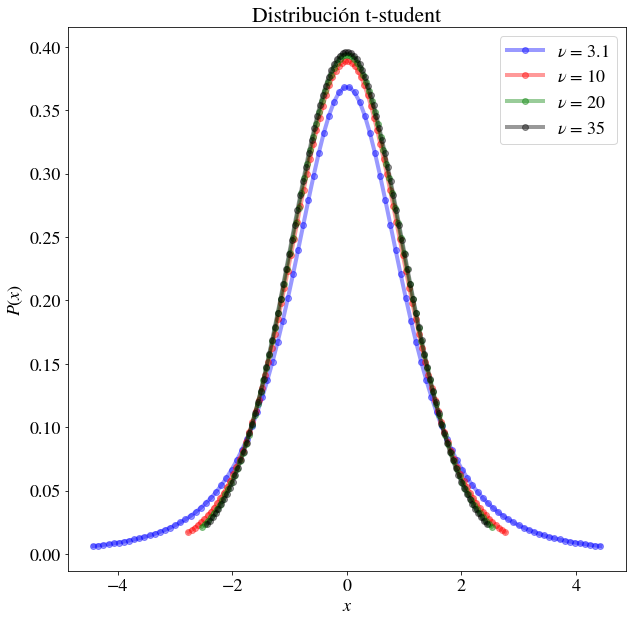

In [ ]:
from scipy.stats import t # Distribución t - student
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

nu_1, nu_2, nu_3, nu_4 = 3.1, 10, 20, 35

media_1, varianza_1, sesgo_1, kurtosis_1 = t.stats(nu_1, moments='mvsk')
media_2, varianza_2, sesgo_2, kurtosis_2 = t.stats(nu_2, moments='mvsk')
media_3, varianza_3, sesgo_3, kurtosis_3 = t.stats(nu_3, moments='mvsk')
media_4, varianza_4, sesgo_4, kurtosis_4 = t.stats(nu_4, moments='mvsk')

print("Media_1 = {:.2f};".format(media_1), "Media_2 = {:.2f};".format(media_2), "Media_3 = {:.2f};".format(media_3), "Media_4 = {:.2f}".format(media_4))
print("Varianza_1 = {:.2f};".format(varianza_1), "Varianza_2 = {:.2f};".format(varianza_2), "Varianza_3 = {:.2f};".format(varianza_3), "Varianza_4 = {:.2f}".format(varianza_4))
print("Sesgo_1 = {:.2f};".format(sesgo_1), "Sesgo_2 = {:.2f};".format(sesgo_2), "Sesgo_3 = {:.2f};".format(sesgo_3), "Sesgo_4 = {:.2f}".format(sesgo_4))
print("Curtosis_1 = {:.2f};".format(kurtosis_1), "Curtosis_2 = {:.2f};".format(kurtosis_2), "Curtosis_3 = {:.2f};".format(kurtosis_3), "Curtosis_4 = {:.2f}".format(kurtosis_4))

x1 = np.linspace(t.ppf(0.01, nu_1), t.ppf(0.99, nu_1), 100)
x2 = np.linspace(t.ppf(0.01, nu_2), t.ppf(0.99, nu_2), 100)
x3 = np.linspace(t.ppf(0.01, nu_3), t.ppf(0.99, nu_3), 100)
x4 = np.linspace(t.ppf(0.01, nu_4), t.ppf(0.99, nu_4), 100)

P1 = t.pdf(x1, nu_1)
P2 = t.pdf(x2, nu_2)
P3 = t.pdf(x3, nu_3)
P4 = t.pdf(x4, nu_4)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x1, P1,'-ob', lw = 4, alpha = 0.4, label = r'$\nu$ = {:.1f}'.format(nu_1))
pyplot.plot(x2, P2,'-or', lw = 4, alpha = 0.4, label = r'$\nu$ = {:d}'.format(nu_2))
pyplot.plot(x3, P3,'-og', lw = 4, alpha = 0.4, label = r'$\nu$ = {:d}'.format(nu_3))
pyplot.plot(x4, P4,'-ok', lw = 4, alpha = 0.4, label = r'$\nu$ = {:d}'.format(nu_4))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(x)$') # Etiqueta del eje y  
pyplot.title('Distribución t-student') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

## Distribución Kolmogorov

La distribución Kolmogorov es una distribución acumulada de la forma:

$$F(x) = 1 - 2\sum_{n=1}^\infty (-1)^{n-1}\exp(-2n^2x^2) = \frac{\sqrt{2\pi}}{x}\sum_{n=1}^\infty \exp\left( -\frac{(2n-1)^2\pi^2}{8x^2} \right)$$

donde es una forma que limita la probabilidad, $\mathbb{P}(\sqrt{n}D_n \leq x)$. El término $\sqrt{n}D_n$ es un límite que depende del número de muestras $n$ y una distancia entre una función de densidad de probabilidad $F_n(x)$ y una función de probabilidad acumulada $F(x)$, $D_n = \max_x\lbrace F_n(x) - F(x)\rbrace$. Esta distribución tiene una media y una varianza dado por:

$$\mu = \sqrt{\frac{\pi}{2}}ln\vert 2 \vert = 0.8687311605$$

$$\sigma^2 = \frac{\pi^2}{12} - \sigma^2 = 0.0677732044$$

Veamos un ejemplo pr´+actico de esta distribución.

Media = 0.8687311606
Varianza = 0.0677732040
Sesgo = 0.8604261361
Curtosis = 0.8816189729


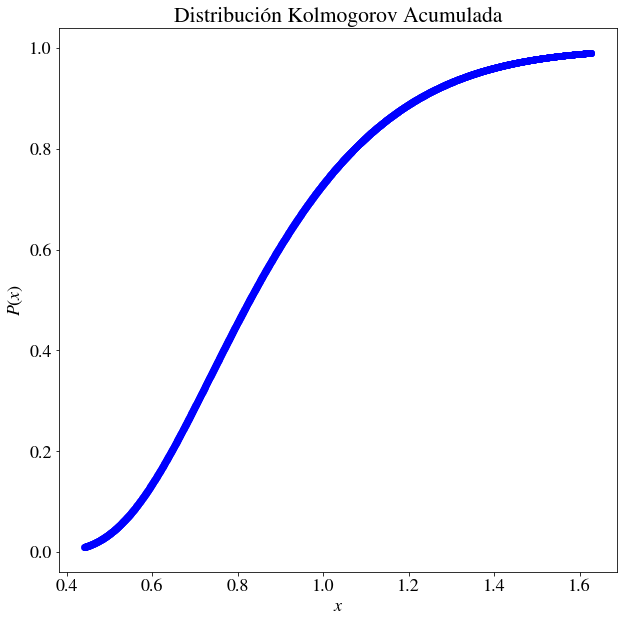

In [ ]:
from scipy.stats import kstwobign # Distribución Kolmogorov
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

media, varianza, sesgo, kurtosis = kstwobign.stats(moments='mvsk')

print("Media = {:.10f}".format(media))
print("Varianza = {:.10f}".format(varianza))
print("Sesgo = {:.10f}".format(sesgo))
print("Curtosis = {:.10f}".format(kurtosis))

x = np.linspace(kstwobign.ppf(0.01), kstwobign.ppf(0.99), 4096)
p = kstwobign.cdf(x)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x, p,'-ob', lw = 4, alpha = 0.4)
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(x)$') # Etiqueta del eje y  
pyplot.title('Distribución Kolmogorov Acumulada') # Titulo de la gráfica
pyplot.show()

# Valor p o p-value

El **valor p o p-value** expresa la probabilidad que resulte al menos un valor extremo que permita validar una estimación mediante pruebas estadísticas basado en distribuciones de probabilidad. Por lo general, un valor p extremo a la media de una distribución de probabilidad representa que los datos están más cercanos a esa distribución. En cambio, un valor p alejado de la media representa aquellos datos que son poco probables que se acerquen a una distribución de probabilidad determinado.

Supongamos que estamos realizando un experimento en lanzar una moneda que creemos que es justa, es decir, una moneda para la cual la cara $h$ o la cruz $t$ son resultados igualmente probables para un sólo lanzamiento.

$$P(h) = P(t) = 0.5$$

Considerando lo anterior, cada lanzamiento lo llamaremos **decisión** donde la probabilidad de cara en cualquier lanzamiento es de 0.5 y la mejor estimación es que obtendremos 5 caras en 10 **pruebas** (aunque también se sabe que en cualquier prueba se puede obtener un número diferente de caras). Suponiendo que lanzamos la moneda 10 veces, y 8 veces cae cara, se desea saber el valor p de probabilidad 0.5 para las caras en un solo lanzamiento o ensayo que produzca 8 caras en 10 pruebas. Para resolver esta inquietud, se utiliza la distribución binomial. 

In [3]:
from scipy.stats import binom

n = 10 # Lanzamientos
p = 0.5 # Probabilidad que caiga cara
x = 8 # punto de referencia

P = binom.pmf(x, n, p)
print("Probabilidad que en un solo lanzamiento se produzca 8 caras en 10 pruebas es = {:.4f}".format(P))

Probabilidad que en un solo lanzamiento se produzca 8 caras en 10 pruebas es = 0.0439


La probabilidad resultante es 0.0439, lo que significa que menos del 5% de las veces esperamos obtener exactamente 8 caras en 10 pruebas o lanzamientos con una moneda justa. Ahora analizaremos que sucede con 9 caras y 10 caras en 10 pruebas o lanzamientos.

In [4]:
from scipy.stats import binom

n = 10 # Lanzamientos
p = 0.5 # Probabilidad que caiga cara
x1 = 9 # punto de referencia 1
x2 = 10 # punto de referencia 1

P1 = binom.pmf(x1, n, p)
P2 = binom.pmf(x2, n, p)
print("Probabilidad que en un solo lanzamiento se produzca 9 caras en 10 pruebas es = {:.4f}".format(P1))
print("Probabilidad que en un solo lanzamiento se produzca 10 caras en 10 pruebas es = {:.4f}".format(P2))

Probabilidad que en un solo lanzamiento se produzca 9 caras en 10 pruebas es = 0.0098
Probabilidad que en un solo lanzamiento se produzca 10 caras en 10 pruebas es = 0.0010


La probabilidad para 9 caras en 10 lanzamientos es de $0.0098$, y para 10 caras en 10 lanzamientos es de $0.0010$. Esto demuestra que a medida que los resultados se alejan del resultado esperado de 5 caras en 10 lanzamientos, se vuelven menos probables. Si evaluamos la probabilidad que la moneda sea justa, los resultados que están lejos de nuestra expectativa (5 caras en 10 lanzamientos) nos dan una fuerte evidencia  que es justa. Con este tipo de preguntas, se calcula la probabilidad no sólo del resultado que obtuvimos en nuestro experimento, sino de resultados al menos tan extremos como los que obtuvimos. En este caso, la probabilidad de obtener 8, 9 o 10 caras en 10 lanzamientos de una moneda justa es: 

$$0.0439 + 0.0098 + 0.0010 = 0.0547$$

El valor $0.0547$ es el *valor p del resultado de al menos 8 caras en 10 ensayos*, utilizando una moneda en la que $P(h) = 0.5$. Los valores p se enlazan comúnmente para la mayoría de los resultados de las investigaciones que implican cálculos estadísticos, en parte porque la intuición es una guía deficiente de lo inusual que es un resultado particular. Por ejemplo, muchas personas podrían pensar que es inusual obtener 8 o más caras en 10 pruebas utilizando una moneda justa. No existe una definición estadística de lo que constituye un resultado *inusual*, por lo que utilizaremos el estándar común de que el valor p de nuestros resultados debe ser inferior a $0.05$

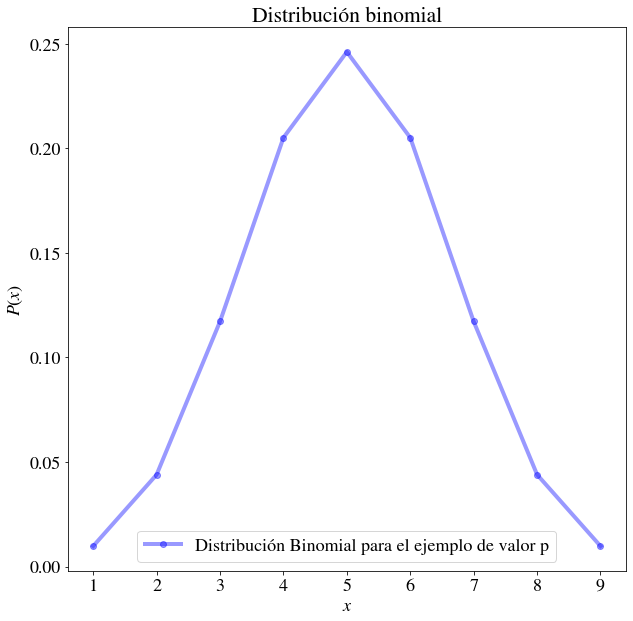

In [5]:
from scipy.stats import binom
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

n = 10 # Lanzamientos
p = 0.5 # Probabilidad que caiga cara
x = np.arange(1,10)
PC = binom.pmf(x, n, p)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x, PC,'-ob', lw = 4, alpha = 0.4, label = 'Distribución Binomial para el ejemplo de valor p')
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(x)$') # Etiqueta del eje y  
pyplot.title('Distribución binomial') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

# Intervalos de Confianza

Por definición, el intervalo de confianza permite **estimar** que tan cerca podemos llegar a un valor verdadero que se estima inicialmente. Aunque no se conoce el valor exacto de lo que se desea estimar, hay una manera de saber ese valor. En este caso, si consideramos que la probabilidad de un valor en un cierto intervalo es del 90% (0.9), no hay un método que permita concluir que el valor más cercano al valor verdadero esta dentro de una campana de Gauss con un nivel del confianza del 90%. Lo mejor que se puede hacer es realizar *varias pruebas* que permita estabelcer el mejor intervalo de confianza. 

Para estimar un intervalo de confianza, consideramos un método llamado **desigualdad de Hoeffding**. Esta desigualdad considera una esperanza matemática $\mathbb {E}(X_i) = \mu$ tal que $X = \lbrace X_1, \ldots, X_i, \ldots, X_N \rbrace$ y un intervalo $a \leq X_i \leq b$. Por consiguiente, se establece una desigualdad dada por:

$$\mathbb{P}(\vert \bar{X_N} - \mu \vert \geq \epsilon) \leq 2\exp\left \lbrack - \frac{2N\epsilon^2}{(b-a)^2}\right \rbrack$$

donde $\bar{X_N} = \frac{1}{N} \sum_{i = 1}^N X_i$ es un estimador de la media $\mu$, $\epsilon > 0$ es un punto extremo de decisión (para conocer los valores de $a$ y $b$), $N$ es el número de muestras,  $a$ y $b$ son los puntos extremos inferior y superior, y $\mathbb{P}(\vert \bar{X_N} - \mu \vert \geq \epsilon)$ es una función de densidad de probabilidad que depende de $a$ y $b$. Observen que esta desigualdad permite establecer un intervalo de confianza para obtener la mejor estimación bajo un umbral. Por lo general, esta desigualdad se puede definir a partir de una función de distribucuión Bernoulli, dado por:

$$\mathbb{P}(\vert \hat{p}_N - p\vert > \epsilon_N)  \leq 2\exp(-2N\epsilon^2)$$

Para este caso, **los intervalos de confianza** son $\mathbb{I} = \lbrack \hat{p}_N - \epsilon_N, \hat{p}_N + \epsilon_N \rbrack$, siendo ${p}_N$ un valor de probabilidad que permite establecer los intervalos más confiables. Para determinar los puntos extremos del intervalo, se puede calcular $\epsilon_N$ como:

$$\epsilon_N = \sqrt{\frac{1}{2N} log \frac{2}{\alpha}}$$

donde $\alpha$ es el **umbral de confianza**, el cual $\mathbb{P}(\vert \hat{p}_N - p\vert > \epsilon_N) \leq \alpha$. 

**Por ejemplo:** Si $N = 100$ y definimos un valor de confianza $\alpha = 0.05$, entonces $\epsilon_N = 0.136$ y por tanto, el 95% del intervalo de confianza esta establecido en el rango:

$$\mathbb{I} = \lbrack \hat{p}_N - 0.136, \hat{p}_N + 0.136 \rbrack$$.

Veamos un ejemplo práctico de esta teoría del intervalo de confianza:

In [6]:
from scipy.stats import bernoulli
import numpy as np

Xi = 0.5
p = bernoulli(Xi) # pdf Bernoulli con X = 0.5
N = 100
alpha = 0.05
Pruebas = 150
X = p.rvs(N*Pruebas).reshape(N,-1)
pn = np.mean(X)
e_n = np.sqrt((1/(2*N))*np.log(2/alpha))
I = np.logical_and((pn - e_n) <= Xi, Xi <= (pn + e_n)).mean()*100  
print("El intervalo esta con un porcentaje de confianza de {:.3f}%".format(I))
print("Intervalos[{:.2f},{:.2f}]".format(pn - e_n, pn + e_n))

El intervalo esta con un porcentaje de confianza de 100.000%
Intervalos[0.37,0.64]


El resultado muestra que el estimador y el intervalo correspondiente fueron capaces de atrapar el verdadero valor al menos el 95% de las veces (aunque nos dio 100% para este caso particular). Así es como se interpreta la acción de los intervalos de confianza. Sin embargo, en la vida real, la desigualdad de Hoeffding tiene limitantes para estimar con datos de mayor tamaño (más muestras y variables). Para solventar esta limitante, se define el **error estándar**, dado por:

$$s_e = \sqrt{\mathbb{V}(\hat{\theta_N})}$$

donde $\theta_N$ es un punto estimado para un parámetro $\theta$ y $\mathbb{V}(\hat{\theta_N})$ es la varianza con respecto a $\hat{\theta_N}$. Considerando la distribución Bernoulli, el estimador $\hat{p} = \frac{1}{N}\sum_{i=1}^N X_i$ y la varianza $\mathbb{V}(\hat{p}_N) = \frac{p(1 - p)}{N}$ y por consiguiente, el error estándar se determina como:

$$s_e = \sqrt{\frac{\hat{p}(1 - \hat{p})}{N}}$$

donde $\hat{p}$ es un promedio de la distribución Bernoulli. Teniendo en cuenta esta métrica, se establece que el intervalo de confianza será $\mathbb{I} = \lbrack \hat{p} - p, \hat{p} + p\rbrack$. Por lo general cada intervalo se puede estimar mediante una distribución Gaussiana para facilitar los mejores valores del intervalo posibles.

Veamos un ejemplo práctico:

In [7]:
def mejores_intervalos_se(p,X):
  SE = np.sqrt(p*(1 - p)/X.shape[0])
  S = norm.interval(0.95, loc = p, scale = SE)
  return S

In [8]:
def mejores_intervalos_dh(p,X):
  N = X.shape[0]
  alpha = 0.05
  E_N = np.sqrt((1/(2*N))*np.log(2/alpha))
  A = p - E_N
  B = p + E_N
  return A,B

Intervalos[0.33, 0.53]


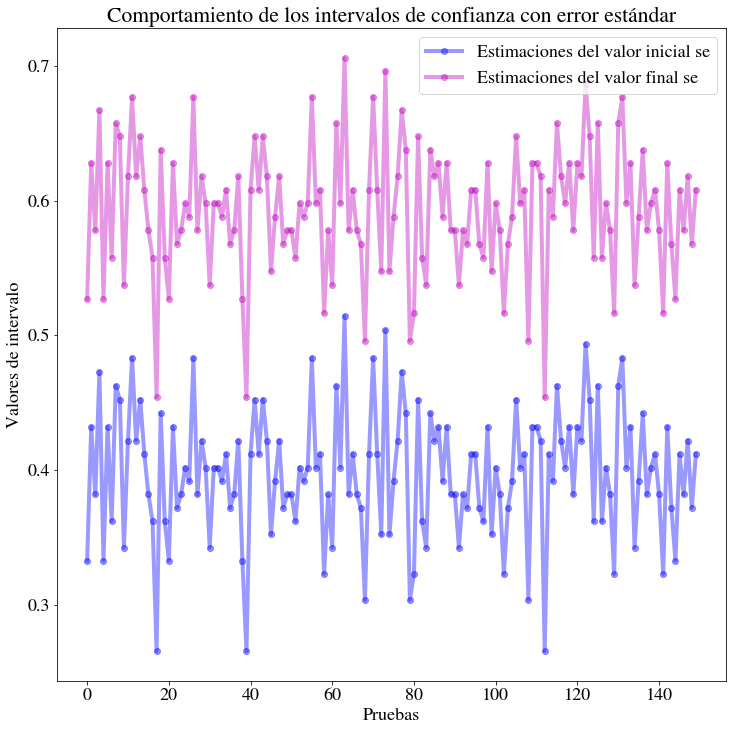

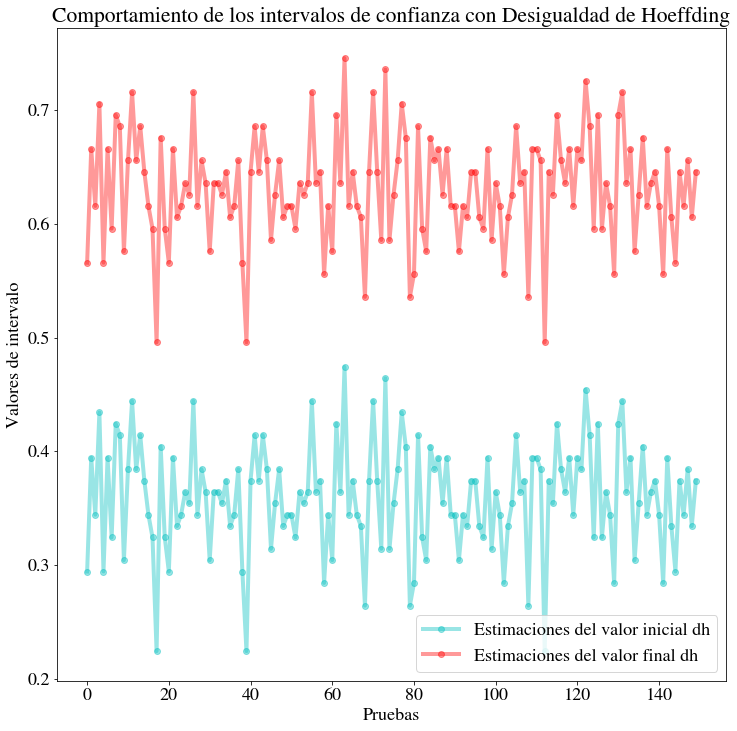

In [10]:
from scipy.stats import bernoulli
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Xi = 0.5
p = bernoulli(Xi) # pdf Bernoulli con X = 0.5
N = 100
alpha = 0.05
Pruebas = 150
X = p.rvs(N*Pruebas).reshape(N,-1)
pn = np.mean(X, axis = 0)
se = np.sqrt(pn*(1 - pn)/X.shape[0])
estimador = norm(0, se[0]) # este es un estimación con distribución Normal o Gaussiana con media 0 y varianza = se
I = np.array(estimador.interval(0.95)) + pn[0]
a, b = mejores_intervalos_se(pn,X)
aa, bb = mejores_intervalos_dh(pn,X) 
print("Intervalos[{:.2f}, {:.2f}]".format(I[0], I[1]))

fig = pyplot.figure(figsize=(12,12))
pyplot.plot(np.arange(0,len(a)), a,'-ob', lw = 4, alpha = 0.4, label = 'Estimaciones del valor inicial se')
pyplot.plot(np.arange(0,len(b)), b,'-om', lw = 4, alpha = 0.4, label = 'Estimaciones del valor final se')
pyplot.xlabel('Pruebas') # Etiqueta del eje x
pyplot.ylabel('Valores de intervalo') # Etiqueta del eje y  
pyplot.title('Comportamiento de los intervalos de confianza con error estándar') # Titulo de la gráfica
pyplot.legend()

fig = pyplot.figure(figsize=(12,12))
pyplot.plot(np.arange(0,len(aa)), aa,'-oc', lw = 4, alpha = 0.4, label = 'Estimaciones del valor inicial dh')
pyplot.plot(np.arange(0,len(bb)), bb,'-or', lw = 4, alpha = 0.4, label = 'Estimaciones del valor final dh')
pyplot.xlabel('Pruebas') # Etiqueta del eje x
pyplot.ylabel('Valores de intervalo') # Etiqueta del eje y  
pyplot.title('Comportamiento de los intervalos de confianza con Desigualdad de Hoeffding') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

A partir de la anterior teoría, Comó se podría encontrar los intervalos de confianza para un vector de datos reales? Vea el siguiente ejemplo:

In [ ]:
from sklearn.datasets import load_wine # Base de datos de clases de vino
from scipy.stats import sem, t, norm
import numpy as np

datos = load_wine()
data = datos.data
X = data[:,0:1]

confianza = 0.95
N = X.shape[0]
mu = np.mean(X)
se = sem(X) # calcula el error estándar de la media de los datos
p1 = t.ppf((1 + confianza ) / 2, N - 1)
p2 = norm.ppf((1 + confianza ) / 2, N)
e_n_1 = se*p1
e_n_2 = se*p2

inicio_1 = mu  - e_n_1
inicio_2 = mu  - e_n_2
final_1 = mu  + e_n_1
final_2 = mu  + e_n_2

In [ ]:
list(map('Intervalo con distribución t : Inicio = {:.2f} y Final = {:.2f}'.format,inicio_1,final_1))

['Intervalo con distribución t : Inicio = 12.88 y Final = 13.12']

In [ ]:
list(map('Intervalo con distribución Gaussiana : Inicio = {:.2f} y Final = {:.2f}'.format,inicio_2,final_2))

['Intervalo con distribución Gaussiana : Inicio = 2.05 y Final = 23.95']

# Pruebas de hipótesis

La prueba de hipótesis es una estrategía que permite usar métodos estadísticos en la toma de decisiones acerca de problemas de la vida real. Por lo general, la prueba de hipótesis involucra un conjunto de pasos, como se mencionan a continuación:

*   Desarrollar una hipótesis de investigación que pueda ser probado matemáticamente.
*   Formalizar formalmente las hipótesis nulas y alternativas.
*   Decidir una prueba estadística apropiada que permita analizar los datos.
*   Tomar la decisión considerando los resultados de la prueba.

Considerando estos pasos, analizaremos el siguiente caso:

Se desea evaluar un nuevo medicamento para tratar la presión alta en el flujo de sangre en el cuerpo humano. La farmacéutica desea establecer que tratamiento tiene el mejor desempeño bajo las mismas condiciones de experimentación. Entonces, la farmacéutica define una hipótesis: *Los pacientes hipertensos tratados con el nuevo fármaco $X$ mostrarán una mayor disminución de su presión arterial que los pacientes hipertensos tratados con el fármaco actualmente disponible $Y$*. Se utiliza $\mu_1$ como la disminución media de la presión sanguína en el grupo tratado con el fármaco $X$ y $\mu_2$ como la disminución media de la presión sanguínea en el grupo que recibe el fármaco $Y$. 

Basado en la información del problema, se define dos hipótesis

$$H_0: \mu_1 \leq \mu_2 $$
$$H_A: \mu_1 > \mu_2$$

donde:

*   $H_0:$ es la hipótesis nula
*   $H_A:$ es la hipótesis alternativa.

Para el ejemplo de la farmacéutica, $H_0$ sería la siguiente: *el fármaco $X$ no es una mejora sobre el fármaco $Y$ porque la disminución de la presión sanguínea lograda por el fármaco $X$ es menor o igual que la lograda por el fármaco $Y$*. Observen que $H_0$ debe ser mutuamente excluido con respecto a $H_A$ para satisfacer una de las dos condiciones de la prueba. Para tomar la decisión, *el grupo tratado con el fármaco $X$ debe lograr una mayor disminución de la presión sanguínea que el grupo tratado con el fármaco $Y$ para que la hipótesis nula sea rechazada*.

En pruebas estadísticas, $H_0$ y $H_A$ se pueden estructurar como **pruebas de hipótesis de dos colas**, que es la forma más usada debido a que se conserva la capacidad de encontrar una *diferencia* en cualquier caso de la prueba de hipótesis:

$$H_0: \mu_1 = \mu_2 $$
$$H_A: \mu_1 \neq \mu_2$$

Este tipo de prueba permite tomar una de las siguientes decisiones:

*   Rechaza la hipótesis nula.
*   No rechace la hipótesis nula.

En estas decisiones, si no se rechaza $H_0$, esto no significa que se verificó que $H_0$ es verdadero, sino más bien que el experimento no determinó suficientes pruebas para rechazarla. Cuando se dice **rechazar la hipótesis nula** significa que se *encuentra resultados estadísticamente significativos* porque el análisis debe mostrar no sólo que hay diferencias entre las medias, sino que esas diferencias son suficientes para aprobar dicha hipótesis.

Para determinar si los resultados son estadísticamente significativos, se utiliza el **valor p** que permite establecer ese criterio ($p < 0.05$).

Veamos un ejemplo práctico de la prueba de hipótesis nula.

In [12]:
import numpy as np
from scipy.stats import sem, t, norm

X = np.array([6.8,6.78,6.77,6.8,6.78,6.8,6.82,6.81,6.8,6.79]) # PH de una piscina pública
confianza_1 = 0.95
confianza_2 = 0.65

N = X.shape[0]
mu = np.mean(X)
se = sem(X) # calcula el error estándar de la media de los datos
p11 = t.ppf((1 + confianza_1) / 2, N - 1)
p12 = t.ppf((1 + confianza_2) / 2, N - 1)
p21 = norm.ppf((1 + confianza_1) / 2, N)
p22 = norm.ppf((1 + confianza_2) / 2, N)
e_n_11 = se*p11
e_n_12 = se*p12
e_n_21 = se*p21
e_n_22 = se*p22

inicio_11 = mu - e_n_11
final_11 = mu + e_n_11

inicio_12 = mu - e_n_12
final_12 = mu + e_n_12

inicio_21 = mu - e_n_21
final_21 = mu + e_n_21

inicio_22 = mu - e_n_22
final_22 = mu + e_n_22

print("Intervalo con distribución t con pvalue = 0.05: Inicio = {:.2f} y Final = {:.2f}".format(inicio_11,final_11))
print("Intervalo con distribución t con pvalue = 0.35: Inicio = {:.2f} y Final = {:.2f}".format(inicio_12,final_12))
print("Intervalo con distribución normal con pvalue = 0.05: Inicio = {:.2f} y Final = {:.2f}".format(inicio_21,final_21))
print("Intervalo con distribución normal con pvalue = 0.35: Inicio = {:.2f} y Final = {:.2f}".format(inicio_22,final_22))

Intervalo con distribución t con pvalue = 0.05: Inicio = 6.78 y Final = 6.81
Intervalo con distribución t con pvalue = 0.35: Inicio = 6.79 y Final = 6.80
Intervalo con distribución normal con pvalue = 0.05: Inicio = 6.74 y Final = 6.85
Intervalo con distribución normal con pvalue = 0.35: Inicio = 6.74 y Final = 6.85


La hipótesis nula de estos datos es que la media poblacional es $6.8$. Observen que los intervalos de confianza se ensanchan más en la distribución normal con respecto a la distribución t, donde está última tiene un intervalo más estrecho. 

In [ ]:
PROM_1 = np.array([inicio_11,final_11]).mean()
PROM_2 = np.array([inicio_12,final_12]).mean()
PROM_3 = np.array([inicio_21,final_21]).mean()
PROM_4 = np.array([inicio_22,final_22]).mean()
print("Media distribución t con pvalue = 0.05 = {:.4f}".format(PROM_1))
print("Media distribución t con pvalue = 0.35 = {:.4f}".format(PROM_2))
print("Media distribución normal con pvalue = 0.05 = {:.4f}".format(PROM_3))
print("Media distribución normal con pvalue = 0.05 = {:.4f}".format(PROM_4))

Media distribución t con pvalue = 0.05 = 6.7950
Media distribución t con pvalue = 0.35 = 6.7950
Media distribución normal con pvalue = 0.05 = 6.7950
Media distribución normal con pvalue = 0.05 = 6.7950


Observe que $6.7950$ es cercano a $6.8$ pero no se puede concluir que ambas medias sean iguales y por tanto se rechaza la hipótesis nula, y se acepta que $\mu_1 \neq \mu_2$.

En la prueba de hipótesis, existen 3 herramientas para realizar varios tipos de análisis de acuerdo a la interacción o dependencia entre variables o atributos de los datos:

1.   **Relación entre variables nominales:** Analiza la interrelación entre los valores de variables nominales, mediante una *tabla de contingencia*. Ese tipo de tabla se calcula mediante las frecuencia de aparición de distintas combinaciones de valores de dos variables. Por lo general, este tipo análisis se realiza mediante el **test chi-cuadrada**, que veremos más adelante.
2.   **Relación entre variables numéricas-nominales:** Analiza las posibles relaciones entre dos variables, una de ellas numérica y la otra nominal, comparando medias y proporciones de los datos. En este método, la hipótesis nula se rechaza si las diferencias entre medias condicionadas a las etiquetas de la variable nominal son debidas a un proceso aleatorio. Por lo general, el **test t** y **ANOVA** son pruebas muy usuadas para este tipo de relaciones.
3.   **Relación entre variables numéricas:** Analiza las posibles relaciones de dos variables numéricas mediante un análisis de regresión o por covarianzas o por correlaciones. Las matrices de **correlación** y de **covarianza** son muy útiles para este tipo de análisis.

De aquí en adelante, estudiaremos algunos de estos test.

# Matriz de Covarianza

La matriz de covarianza es un arreglo de grados de relación lineal existente entre los valores de dos variables numéricas tal que $cov(x_n,x_m)$ es la covarianza entre un dato $x_n$ y otro dato $x_m$, tal que $n \neq m$. Si $n = m$, entonces se determina la varianza $var(x_n)$, que representará como la diagonal principal de la matriz.

$$\Sigma_x = \frac{1}{N} \sum_{n=1}^N (x_n - \mu_c)(x_n - \mu_c)^T$$

donde $N$ es el número de muestras y $\mu_c$ es la media de cada variable:

$$\mu_c = \frac{1}{N} \sum_{n=1}^N x_{n,c}$$

siendo $c = \lbrace 1, \ldots, K \rbrace$, donde $K$ es el número de variables. El arregolo matricial de $\Sigma_x$ tiene la siguiente representación:

$$\Sigma_x = \begin{bmatrix} var(x_1) & cov(x_1,x_2) & \ldots & cov(x_1,x_K)\\
cov(x_2,x_1) & var(x_2) & \ldots & cov(x_2,x_K)\\
\vdots & \vdots & \ddots & \cdots\\
cov(x_K,x_1) & cov(x_k,x_2) & \ldots & var(x_K) \end{bmatrix}$$

La covarianza se maximiza si dos vectores de datos son idénticos y si la covarianza es $0$ entonces ambos vectores son ortogonales. Si la covarianza tiene valores negativos significa que ambos vectores tienen direcciones opuestas.

Veamos un ejemplo práctico de la matriz de covarianza.

,fixed acidity,volatile acidity
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


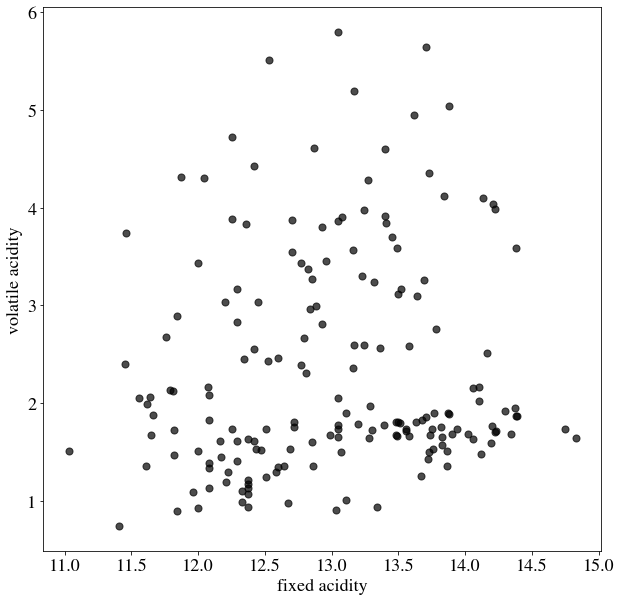

In [14]:
from sklearn.datasets import load_wine # Base de datos de clases de vino
import numpy as np
from matplotlib import pyplot
import matplotlib
import seaborn as sn
import pandas as pd

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

datos = load_wine()
data = datos.data
X = data[:,0:2]
nombres = ['fixed acidity', 'volatile acidity']
data_comp = pd.DataFrame(X, columns = nombres)
display(data_comp)

Matrix_Covarianza = np.cov(data_comp.transpose(), bias=True) # bias = True normaliza los datos (les recomienda esa opción)

pyplot.figure(figsize=(10,10))
pyplot.scatter(data_comp['fixed acidity'], data_comp['volatile acidity'], s = 50, c = 'black', alpha = 0.7)

pyplot.xlabel('fixed acidity')
pyplot.ylabel('volatile acidity')

pyplot.show()

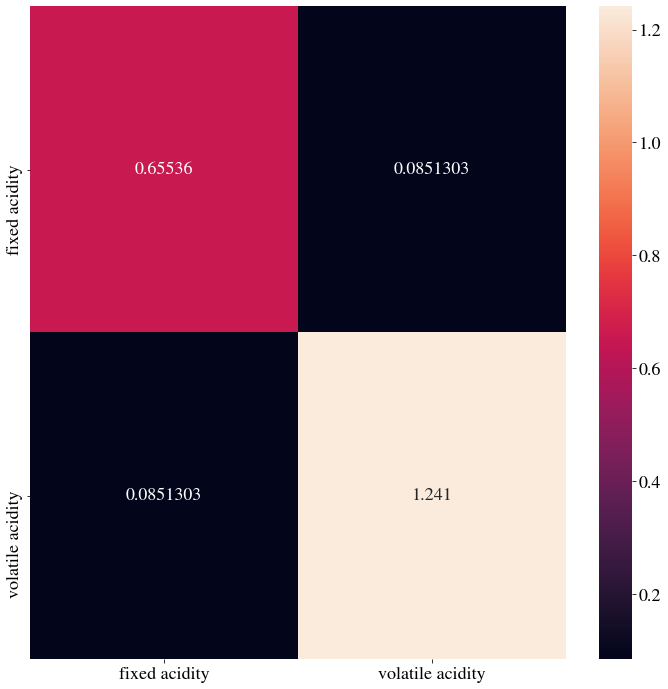

In [ ]:
pyplot.figure(figsize=(12,12))
ax = sn.heatmap(Matrix_Covarianza, annot=True, fmt='g', xticklabels = ['fixed acidity', 'volatile acidity'], yticklabels = ['fixed acidity', 'volatile acidity'])
pyplot.show()

# Matriz de Correlación

La matriz de correlación es la matriz de covarianza normalizada con las varianzas de cada variable o atributo. Definimos la varianza para la correlación, $\sigma_{x_i}^2$, como:

$$\sigma_{x_c}^2 = \frac{1}{N-1}\sum_{n=1}^N (x_{n,c} - \mu_c)^2 $$

Por consiguiente, la matriz de correlación tendrá el siguiente arreglo:

$$Cor_x = \begin{bmatrix} \frac{var(x_1)}{\sigma_{x_1}^2} & \frac{cov(x_1,x_2)}{\sigma_{x_1}^2\sigma_{x_2}^2} & \ldots & \frac{cov(x_1,x_K)}{\sigma_{x_1}^2\sigma_{x_K}^2}\\
\frac{cov(x_2,x_1)}{\sigma_{x_2}^2\sigma_{x_1}^2} & \frac{var(x_2)}{\sigma_{x_2}^2} & \ldots & \frac{cov(x_2,x_K)}{\sigma_{x_2}^2\sigma_{x_K}^2}\\
\vdots & \vdots & \ddots & \cdots\\
\frac{cov(x_K,x_1)}{\sigma_{x_K}^2\sigma_{x_1}^2} & \frac{cov(x_k,x_2)}{\sigma_{x_K}^2\sigma_{x_1}^2} & \ldots & \frac{var(x_K)}{\sigma_{x_K}^2} \end{bmatrix}$$

Por lo general, la diagonal principal es un vector de $1$. Si la correlación es cercano a $0$, significa que ambas variables son independientes y diferentes entre sí.

Veamos un ejemplo práctico de dicha matriz.

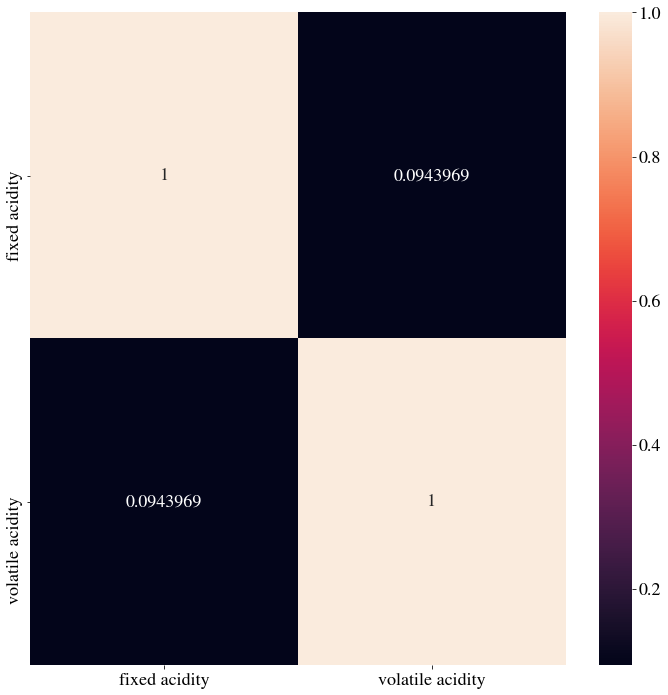

In [ ]:
Matriz_Correlacion = data_comp.corr()
pyplot.figure(figsize=(12,12))
ax = sn.heatmap(Matriz_Correlacion, annot=True, fmt='g', xticklabels = ['fixed acidity', 'volatile acidity'], yticklabels = ['fixed acidity', 'volatile acidity'])
pyplot.show()

## Coeficiente de Correlación de Pearson

El coeficiente de correlación de Pearson o de correlación producto-momento para una población y una muestra de datos, es una métrica que relaciona las variables basado en una correlación lineal. Por lo general, si el coeficiente es -1 entonces hay una correlación lineal negativa entre dos variables; si el coeficiente es 0 entonces no hay correlación entre dos variables; y si el coeficiente es +1 entonces hay correlación lineal positiva entre dos variables.

El coeficiente de correlación de Pearson para una muestra $r$ se expresa como:

$$r = \frac{S_{xy}}{\sqrt{S_{x}S_{y}}} = \frac{\sum_{n=1}^N (x_n - \mu_x)(y_n - \mu_y)}{\sqrt{\sum_{n=1}^N (x_n - \mu_x)^2}\cdot \sqrt{\sum_{n=1}^N (y_n - \mu_y)^2}}$$

donde $\mu_x$ y $\mu_y$ son las medias de $x$ e $y$, $S_x$ y $S_y$ son las sumas de los cuadrados de $x$ e $y$, y $S_xy$ es la suma de los cuadradados de tanto $x$ como $y$. Por lo general, $r \in \lbrack 0,1 \rbrack$, donde $r = 1$ significa que dos variables son altamente correlacionadas y $r = 0$ significa que no hay correlación entre las variables. Lo anterior es válido si la relación es lineal.

**Nota:** El valor de $r$ de Pearson puede ser engañoso si los datos tienen una relación no lineal, por lo que siempre se deben graficar los datos. En este caso, se debe visualizar que los puntos agrupados sean más estrechamente alrededor de una línea trazada a través de los datos. Para este caso, se recomienda hacer un análisis de regresión lineal simple o múltiple.

Veamos un ejemplo práctico de dicho coeficiente:

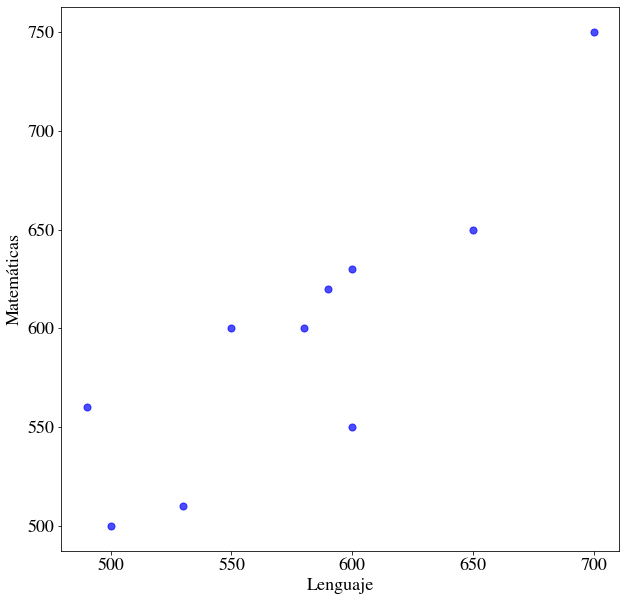

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Notas_Lenguaje = np.array([490,500,530,550,580,590,600,600,650,700])
Notas_Matematicas = np.array([560,500,510,600,600,620,550,630,650,750])
Notas = np.vstack((Notas_Lenguaje.T, Notas_Matematicas.T))
Notas_PD = pd.DataFrame(Notas.T, columns = ['Lenguaje','Matemáticas'])

pyplot.figure(figsize=(10,10))
pyplot.scatter(Notas_PD['Lenguaje'], Notas_PD['Matemáticas'], s = 50, c = 'blue', alpha = 0.7)
pyplot.xlabel('Lenguaje')
pyplot.ylabel('Matemáticas')

pyplot.show()

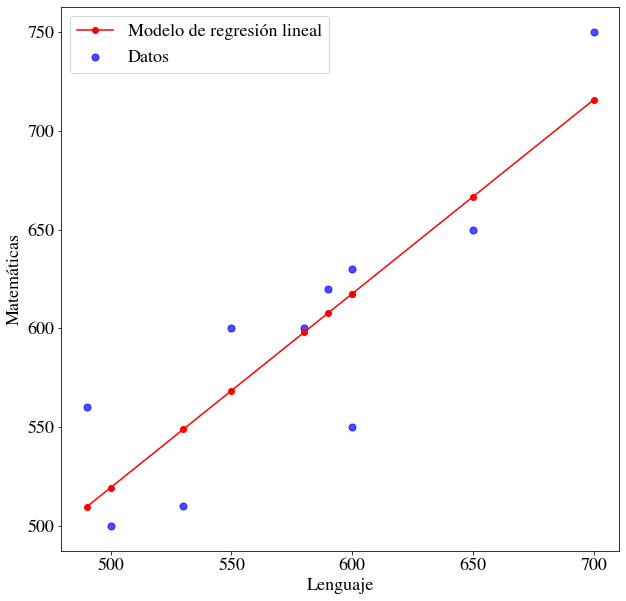

In [ ]:
from sklearn.linear_model import LinearRegression # Regresión lineal
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

LR = LinearRegression() # Modelo de regresión lineal
X = Notas_Lenguaje.reshape((-1, 1)) # se recomiendo reajustar los valores con reshape para la variable indepdendiente.
LR.fit(X,Notas_Matematicas)
Y_pred = LR.predict(X)

pyplot.figure(figsize=(10,10))
pyplot.scatter(Notas_PD['Lenguaje'], Notas_PD['Matemáticas'], s = 50, c = 'blue', alpha = 0.7, label = 'Datos')
pyplot.plot(Notas_PD['Lenguaje'], Y_pred,'-or',label = 'Modelo de regresión lineal')
pyplot.xlabel('Lenguaje')
pyplot.ylabel('Matemáticas')
pyplot.legend()
pyplot.show()

In [ ]:
from scipy.stats import pearsonr # Coeficiente de Correlación de Pearson

r_valor, p_valor = pearsonr(Notas_Matematicas,Y_pred)
print("El valor del coeficiente de correlación de Pearson es r = {:.3f}".format(r_valor))
print("El valor del p_value para el coeficiente de correlación de Pearson es = {:.3f}".format(p_valor))

El valor del coeficiente de correlación de Pearson es r = 0.870
El valor del p_value para el coeficiente de correlación de Pearson es = 0.001


Observen que $r$ tiene un valor mayor a 0.8, lo cual indica que el modelo de regresión lineal se ajusta a la tendencia de los datos y se puede utilizar para hacer otras predicciones con datos de la misma naturaleza. Por otra parte, el valor p de está métrica esta por debajo de $0.05$, lo cual no se rechaza la hipótesis nula que la media de los datos de las notas matemáticas es aproximadamente igual a la media de la salida $y_{pred}$ del modelo de regresión lineal.

## Correlación de rango de Spearman

La correlación de rango de Spearman o coeficiente de correlación de Spearman se desarrollo para analizar los datos cuando hay presencia de datos atípicos o ruido (esa parte lo analizaremos en otra unidad), haciendo una medida más confiable de la prueba de hipótesis y el desempeño de los modelos de regresión. Por lo general, esta métrica calcula el rango de cada valor el cual es el índice de aparición de los valores. Por ejemplo, tenemos un vector de datos $\lbrack 1, 2, 5, 7 \rbrack$ y el valor $5$ esta ubicado en el índice $3$ y el valor $7$ esta ubicado en el índice $4$. 

Matemáticamente, la correlación de rango de Spearman se expresa como:

$$r = 1 - \frac{6\sum_{n=1}^N d_n^2}{N(N^2 - 1)}$$

donde $d_n^2$ es la diferencia entre un par de rangosy $N$ es el número de casos o rangos. $d_n^2$ por lo general se expresa como:

$$d_n^2 = (rg(X_n) - rg(Y_n))^2$$

siendo $rg(\cdot)$ el rango de valores ordenados de una variable. 

El coeficiente $r$ tiene un rango $\lbrack 0,1 \rbrack$, donde $r = 1$ representa la máxima correlación entre dos variables.

In [ ]:
from scipy.stats import spearmanr

s_valor, p_valor = spearmanr(Notas_Matematicas,Y_pred)
print("El valor del coeficiente de correlación de Spearman s = {:.3f} ".format(s_valor))
print("El valor del p_value para la correlación de Spearman es = {:.3f}".format(p_valor))

El valor del coeficiente de correlación de Spearman s = 0.787 
El valor del p_value para la correlación de Spearman es = 0.007


# Test t

Teniendo en cuenta la distribución t-student visto en la secciones anteriores, nos enfocaremos en esta sección en el test t o prueba t. En dicha prueba, se analiza como las muestras se pueden modelar desde una población de distribución normal (Gaussiana) y como **la desviación estandar muestral se puede estimar como una varianza poblacional**, lo cual la distribución de las medias muestrales para una variable $x$ se puede determinar como:

$$t = \frac{\bar{x}-\mu}{(s/\sqrt{N})}$$

donde $\bar{x}$ es la media de una muestra de datos, $\mu$ es la media poblacional, $s$ es la desviación estándar poblacional y $N$ es el tamaño de las muestras de los datos.

Considerando la anterior ecuación, la prueba t se puede usar para comparar la media de una muestra con respecto a una población con una media conocida. Para este caso, la *hipótesis nula* esta establecida como no hay diferencias significativas entre la media en la población desde el cual la muestra esta definida y la media de la población conocida.

Lo anterior se interpreta de la siguiente forma:

**Por ejemplo**, se requiere conocer los efectos de la exposición al plomo en la inteligencia de los niños. Se sabe que para los niños de 5 años en los Estados Unidos en su conjunto, la puntuación media en un test de inteligencia particular es de 100. Si se tiene una muestra de 15 niños de 5 años que han sido expuestos al plomo, y quiere saber si esta exposición ha afectado la inteligencia según la medición de esta prueba en particular. También se sabe que los puntajes de inteligencia generalmente asumen una distribución Gaussiana en esta población. Por consiguiente, la hipótesis nula es que no hay diferencia en las puntuaciones de inteligencia del grupo expuesto al plomo y de la población en su conjunto, y realizará un test de dos colas con un valor de confianza $p = 0.05$.

A partir del ejemplo anterior, la ecuación del test t se transforma en **test t de una muestra:**

$$t = \frac{\bar{x}-\mu_0}{(s_0/\sqrt{N})}$$

donde \bar{x} es la media de la muestra, $\mu_0$ es la media de referencia que se conoce, $s_0$ es la desviación estándar de la muestra y $N$ es el tamaño de la muestra. Si consideramos el ejemplo de los efectos de la exposición al plomo en la inteligencia de los niños, se calcula $t$ como:

$$t = \frac{90-100}{(10/\sqrt{15})} = -3.87$$

Los grados de libertad para la prueba t de una muestra es $n-1$; en este ejemplo, $df = 15 - 1 = 14$. Si se determina el valor crítico superior para la distribución t, vemos que el valor crítico superior para una prueba t con 14
grados es $2.145$, si $pvalue \leq 0.025$. Debido a que el valor absoluto de la estadística t para los datos exceden el valor crítico superior $(\vert -3.87 \vert > 2.145)$, se rechaza la hipótesis nula de que los niños expuestos al plomo tengan el mismo promedio de puntaje en el test de inteligencia como los niños de su edad en toda la población. Por consiguiente, la diferencia de la media y las estadísticas t son negativas, también podemos decir que la media de la puntuación de la inteligencia es menor para los niños expuestos al plomo en comparación con el promedio de los niños de la misma edad en la población en su conjunto.

Para determinar el valor crítico, se debe calcular la función de probabilidad acumulada de la distribución t-student y luego localizar en $x$ cuando $p \leq 0.025$

El valor crítico superior con p = 0.025 es:  2.145213522769254


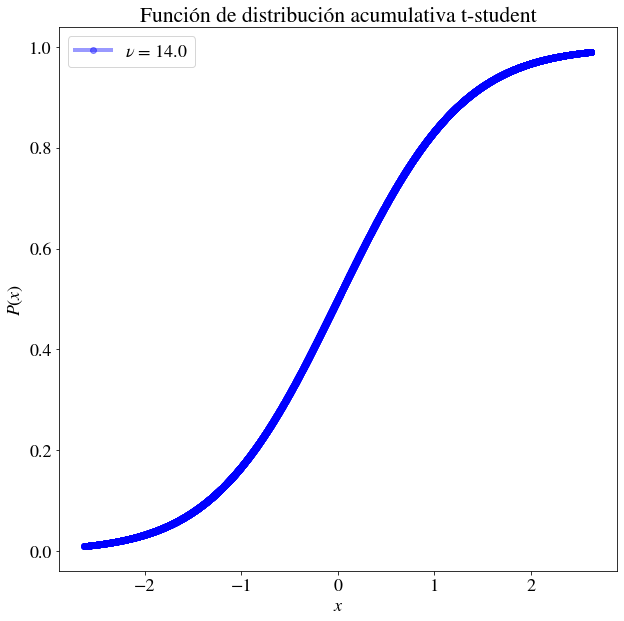

In [ ]:
from scipy.stats import t # Distribución t - student
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

nu_1 = 14 # grados de libertad

x1 = np.linspace(t.ppf(0.01, nu_1), t.ppf(0.99, nu_1), 10000)
P1 = t.cdf(x1, nu_1)

pos_0025 = np.where(P1 <= 0.025)
p_0025 = np.where(x1[pos_0025] < 0) 
X_POS = np.abs(np.max(x1[p_0025]))
print("El valor crítico superior con p = 0.025 es: ", X_POS)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x1, P1,'-ob', lw = 4, alpha = 0.4, label = r'$\nu$ = {:.1f}'.format(nu_1))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(x)$') # Etiqueta del eje y  
pyplot.title('Función de distribución acumulativa t-student') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

Hasta el momento, solo se ha analizado con una sola variable pero qué sucede si tenemos dos muestras independientes?. Para resolver esta inquietud, se establece el **test t de dos muestras**. El proposito de ese test es determinar si las medias de las poblaciones de las que se extrajeron las muestras son iguales. Para este caso, se supone que las dos muestras no están relacionados entre sí y que han sido seleccionados independientemente de sus poblaciones. Además, suponemos que las poblaciones de las que se seleccionaron las muestras tienen una distribución normal o Gaussiana, al menos que las muestras sean suficientemente grandes para invocar el teorema del límite central, y que las poblaciones tienen una varianza aproximadamente igual. 

Basado en el anterior enfoque del test t, se determina que:

$$t = \frac{(\bar{x_1}-\bar{x_2}) - (\mu_1 - \mu_2)}{\sqrt{s_p^2 \left( \frac{1}{N_1}+\frac{1}{N_2} \right)}}$$

donde:

$$s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_1 - 1)s_2^2}{N_1 + N_2 - 2}$$

siendo $\bar{x_1}$ y $\bar{x_2}$ dos medias de dos muestras independientes, $\mu_1$ y $\mu_2$ son las medias de dos poblaciones, $s_p^2$ es la varianza acumulada, $s_1^2$ y $s_2^2$ son las varianzas de dos muestras y $N_1$ y $N_2$ son dos tamaños de dos muestras.

Por lo general, la hipotesis nula para muestras independientes con test t es la diferencia entre las medias pobacionales debe ser cercano a 0 para que sea rechazado la hipótesis.

Veamos ejemplos prácticos del test t.

In [ ]:
from sklearn.datasets import load_wine # Base de datos de clases de vino
import pandas as pd # Dataframe

datos = load_wine()
data = datos.data
data_nominal = datos.target
X = data[:,[1]]
Y = data_nominal
DATA = np.vstack((X.T,Y.T))
nombres = ['fixed acidity', 'clases']
data_comp = pd.DataFrame(DATA.T, columns = nombres)
print("Tamaño de los datos = {:d} muestras y {:d} variables o características".format(DATA.T.shape[0], DATA.T.shape[1]))
display(data_comp)

Tamaño de los datos = 178 muestras y 2 variables o características


,fixed acidity,clases
0,1.71,0.0
1,1.78,0.0
2,2.36,0.0
3,1.95,0.0
4,2.59,0.0
...,...,...
173,5.65,2.0
174,3.91,2.0
175,4.28,2.0
176,2.59,2.0


In [ ]:
from scipy.stats import ttest_1samp # t-test de una muestra

media_1 = 10 # media conocida
media_2 = 5 # media conocida
media_3 = 0 # media conocida

t_1, pvalue_1 = ttest_1samp(data_comp,media_1)
t_2, pvalue_2 = ttest_1samp(data_comp,media_2)
t_3, pvalue_3 = ttest_1samp(data_comp,media_3)
t_4, pvalue_4 = ttest_1samp(data_comp,[media_2,media_1])
t_5, pvalue_5 = ttest_1samp(data_comp,[media_1,media_3])
t_6, pvalue_6 = ttest_1samp(data_comp,[media_2,media_3])

In [ ]:
list(map('Prueba 1: t = {:.2f} y pvalue = {:.2f}'.format,t_1,pvalue_1))

['Prueba 1: t = -91.52 y pvalue = 0.00',
 'Prueba 1: t = -155.99 y pvalue = 0.00']

In [ ]:
list(map('Prueba 2: t = {:.2f} y pvalue = {:.2f}'.format,t_2,pvalue_2))

['Prueba 2: t = -31.81 y pvalue = 0.00',
 'Prueba 2: t = -69.92 y pvalue = 0.00']

In [ ]:
list(map('Prueba 3: t = {:.2f} y pvalue = {:.2f}'.format,t_3,pvalue_3))

['Prueba 3: t = 27.90 y pvalue = 0.00', 'Prueba 3: t = 16.15 y pvalue = 0.00']

In [ ]:
list(map('Prueba 4: t = {:.2f} y pvalue = {:.2f}'.format,t_4,pvalue_4))

['Prueba 4: t = -31.81 y pvalue = 0.00',
 'Prueba 4: t = -155.99 y pvalue = 0.00']

In [ ]:
list(map('Prueba 5: t = {:.2f} y pvalue = {:.2f}'.format,t_5,pvalue_5))

['Prueba 5: t = -91.52 y pvalue = 0.00', 'Prueba 5: t = 16.15 y pvalue = 0.00']

In [ ]:
list(map('Prueba 6: t = {:.2f} y pvalue = {:.2f}'.format,t_6,pvalue_6))

['Prueba 6: t = -31.81 y pvalue = 0.00', 'Prueba 6: t = 16.15 y pvalue = 0.00']

En este test, H1 = la media de las muestras es igual a la media conocida y H2 = la media de las muestras NO es igual a la media conocida y son diferentes. Con los resultados de las 6 pruebas, nosotros rechazamos la hipótesis nula en el segundo caso y no rechazamos H1. Por consiguiente, ambas variables son estadísticamente significativos.

Aunque consideramos un test t para una muestra, es necesario analizar el caso de la independencia entre variables con el test t de dos variables. Veamos un ejemplo práctico.

In [ ]:
from scipy.stats import ttest_ind # t-test de dos muestras independientes

t_ind, pvalue_ind = ttest_ind(data_comp['fixed acidity'], data_comp['clases'])

print("Prueba independiente: t = {:.2f} y pvalue = {:.2f}".format(t_ind,pvalue_ind))

Prueba independiente: t = 13.72 y pvalue = 0.00


# Test exacto de Fisher

El test exacto de Fischer calcula la probabilidad de una entrada particular de una **tabla de contingencia**, condicionado por filas de valores marginales y columna de sumas de valores. Considerando que este test considera una tabla de contingencia, dicha tabla es una representación de la partición de una muestra poblacional de dos categorías entre dos diferentes clasificaciones, como se muestra en la tabla ejemplo:

|      |Vendido |No Vendido | Total |
|------------|------|------|------|
|T-shirt|13|11|24|
|------------|------------|------------|------------|
|Camisas|12|1|13|
|------------|------------|------------|------------|
|Total|25|12|37|
|----------------|------------|------------|------------|

La pregunta que se formula a partir de esta tabla es la siguiente: la tabla corresponde o no a una partición aleatoria de la muestra poblacional, condensado por sumas marginales. Note que debido a establa de 2x2, un cambio de algún valor automáticamente afecta todo los valores restantes de las sumas. Para analizar este tipo de casos, el test exacto de Fisher permite resolver esta inquietud, mediante una **distribución hipérgeométrica**:

$$\mathbb{P}(X = k) = \frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}$$

donde:

*   $\mathbb{P}(X = k) = \mathbb{P}(X_{i,j} \vert r_1,r_2,c_1,c_2)$ es la probabilidad de un valor particular de la tabla de contingencia, siendo $i,j$ una ubicación de una celda de la tabla, $r_1$ es la suma de la primera fila, $r2$ es la suma de la segunda fila, $c_!$ es la suma de la primera columna y $c_2$ es la suma de la segunda columna.
*   $N$ es el tamaño de la población.
*   $K$ es el número total de posibles valores favorables.
*   $n$ es el número de valores favorables.
*   $k$ es el número de valores favorables observados.

Por convención, $K = r_1$, $k = x$, $n = c_1$ y $N = c_1 + c_2$. 

Veamos un ejemplo práctico de dicha tabla.


In [ ]:
from scipy.stats import fisher_exact
import numpy as np

tabla_contingencia = np.array([[13,11],[12,1]])
tasa_pares_1, p_valor_1 = fisher_exact(tabla_contingencia, alternative = 'two-sided')
tasa_pares_2, p_valor_2 = fisher_exact(tabla_contingencia, alternative = 'less')
tasa_pares_3, p_valor_3 = fisher_exact(tabla_contingencia, alternative = 'greater')
# tasa_pares es una proporción de probabilidades previas y no una estimación posterior.
print("tasa pares = {:.4f};{:.4f};{:.4f}".format(tasa_pares_1,tasa_pares_2,tasa_pares_3))
print("Valores p = {:.4f};{:.4f};{:.4f}".format(p_valor_1,p_valor_2,p_valor_3))

Probabilidades previas = 0.0985;0.0985;0.0985
Valores p = 0.0272;0.0190;0.9985


Observen que el valor p de $0.0272$ se calcula en ambos casos extremos, mientras que el p-value en el extremo *less* o *menor* de $0.0190$ significa que se calcula la distribución hipergeométrica cuando las probabilidades de estos con un número de T-shirt vendidos es menor o igual a $13$. Por otra parte, el valor p de $0.9985$ en el extremo *greater* o *mayor* significa que es el cálculo de la distribución hipergeométrica cuando las probabilidades de estos con un número de t-shirt total vendidos es menor o igual a $25$, considerando que un solo día se vendieron $13$ t-shirts. Una interpretación similar se puede aplicar para el caso de las camisas.

Teniendo en cuenta que $p < 0.05$ es estadísticamente significativo, un valor $p = 0.0272$ es significativo, lo cual se concluye que 13 t-shirts vendidos en esta población total de ropa de una tienda es relevante. 


# Test Chi-Cuadrada

El test Chi-Cuadrada evalua las relaciones entre dos o más variables categóricas, implicando un cálculo de la distribución chi-cuadrada de las probabilidades que se desean encontrar a partir de la tabla de contingencia. En la literatura, hay varios tipos de test chi-cuadrada:

1.   Test chi-cuadrada para la independencia entre variables.
2.   Test chi-cuadrada para la igualdad de proporciones.
3.   Test chi-cuadrada para la bondad del ajuste.

Explicaremos cada una de estos tipos de test chi-cuadrada.

## Test chi-cuadrada para la independecia entre variables

Este tipo de test es aplicable para un análisis bivariable nominales y determina si es rechazable la hipótesis que dos variables son independientes o no. Bajo una hipótesis nula se determinan los casos en el supuesto de variables son independientes. Los valores esperados se determinan con probabilidades marginales de las categorías. A partir de estas probabilidades, el test $\mathcal{X}^2$ mide la diferencia entre los valores esperados y los valores observados, de acuerdo al grado de libertad de la distribución chi-cuadrada:

$$\mathcal{X}^2 = \sum_{i=1}^{p_1} \sum_{j=1}^{p_2} \frac{(E_{i,j} - O_{i,j})^2}{E_{i,j}}$$

siendo $E_{i,j}$ y $O_{i,j}$ el valor esperado y el valor observado entre una fila $i$ con respecto a una columna $j$. Esta expresión esta bajo el supuesto de la hipótesis nula que sigue una distribución chi-cuadrada. Si no se cumple la hipótesis nula, entonces las variables son dependientes entre sí.

Para calcular $E_{i,j}$, se realiza la siguiente operación matemática:

$$E_{i,j} = \frac{Total_{filas}xTotal_{Columnas}}{Total_{filas\,\, y\,\, columnas}}$$

Consideremos la tabla de contingencia usada en el test exacto de Fisher (valores observados):

|      |Vendido |No Vendido | Total |
|------------|------|------|------|
|T-shirt|13|11|24|
|------------|------------|------------|------------|
|Camisas|12|1|13|
|------------|------------|------------|------------|
|Total|25|12|37|
|----------------|------------|------------|------------|

$$E_{1,1} = \frac{24x25}{37} = 22.2$$
$$E_{1,2} = \frac{24x12}{37} = 7.78$$
$$E_{2,1} = \frac{13x25}{37} = 8.78$$
$$E_{2,2} = \frac{13x12}{37} = 4.21$$

Entonces la tabla de valores esperados es la siguiente:

|      |Vendido |No Vendido | Total |
|------------|------|------|------|
|T-shirt|22.2|7.78|29.98|
|------------|------------|------------|------------|
|Camisas|8.78|4.21|12.99|
|------------|------------|------------|------------|
|Total|30.98|11.99|42.97|
|----------------|------------|------------|------------|

Teniendo en cuenta esa forma de operación, veamos como se aplica en Python

In [ ]:
from scipy.stats import chisquare
import numpy as np

valores_observados = np.array([[13,11],[12,1]])
chi_valores,p_valores = chisquare(valores_observados.ravel(), ddof = [1,2]) # ddof son los grados de libertad de la distribución chi-cuadrada
print("Valor de chi-cuadrada = {:.3f}".format(chi_valores))

Valor de chi-cuadrada = 10.027


In [ ]:
print('Valores p = ',p_valores)

Valores p =  [0.00664751 0.0015426 ]


Considerando $p < 0.05$, observen que para diferentes grados de libertad tenemos valores por debajo del umbral de confianza, lo cual, se rechaza la hipótesis nula que las dos variables de t-shirt y camisas tienen una relación entre sí.

## Test chi-cuadrada para la igualdad de proporciones.

Este tipo de test calcula exactamente de la misma forma que el test anterior, pero se prueba una estrategía diferente de hipótesis. En este caso, la prueba de igualdad de proporciones se utiliza para los datos que se han extraído de múltiples poblaciones independientes, y la hipótesos nula es que la distribución de alguna variable es la misma en todas poblaciones. Por ejemplo, podríamos extraer muestras aleatorias de diferentes grupos étnicos y probar si las tasas de diagnóstico de cáncer de pulmón son iguales o diferentes en todas las poblaciones; nuestra hipótesis nula sería que son las mismas.

Veamos un ejemplo con este tipo de test.

In [ ]:
from statsmodels.stats.proportion import proportions_chisquare
import pandas as pd

datos = pd.DataFrame({"Tshirts": [13, 11, 50, 10], "Camisas": [12, 1, 3, 7]})

#Las columnas 3 y 4 de ambas variables significan "Devueltos" y "Para compra online"
# nobs es el número de ensayos u observaciones, del mismo tamaño de los datos observados.

chi_valor_1, p_valor_1, tabla_esperada_1 = proportions_chisquare(datos.Tshirts, nobs = datos.sum(axis = 1))
chi_valor_2, p_valor_2, tabla_esperada_2 = proportions_chisquare(datos.Camisas, nobs = datos.sum(axis = 1))
print('Valor Chi-Cuadrada tshirts y camisas = {:.3f} y {:.3f}'.format(chi_valor_1,chi_valor_2))
print('p - valor Chi-Cuadrada tshirts y camisas = {:.9f} y {:.9f}'.format(p_valor_1,p_valor_2))
print('Tabla esperada t-shirt = \n',tabla_esperada_1)
print('Tabla esperada camisas = \n',tabla_esperada_2)

Valor Chi-Cuadrada tshirts y camisas = 23.417 y 23.417
p - valor Chi-Cuadrada tshirts y camisas = 0.000033057 y 0.000033057
Tabla esperada t-shirt = 
 (array([[13, 12],
       [11,  1],
       [50,  3],
       [10,  7]]), array([[19.62616822,  5.37383178],
       [ 9.42056075,  2.57943925],
       [41.60747664, 11.39252336],
       [13.34579439,  3.65420561]]))
Tabla esperada camisas = 
 (array([[12, 13],
       [ 1, 11],
       [ 3, 50],
       [ 7, 10]]), array([[ 5.37383178, 19.62616822],
       [ 2.57943925,  9.42056075],
       [11.39252336, 41.60747664],
       [ 3.65420561, 13.34579439]]))


Pregunta de análisis: ¿Qué conclusión se podría sacar del valor p para este test?

## Test chi-cuadrada para la bondad del ajuste

El test chi-cuadrada para la bondad del ajuste se utiliza para verificar la hipótesis que la distribución de una variable categórica dentro de una población sigue un patrón específico de proporciones, mientras que la hipótesis alternativa es que la distribución de la variable sigue algún otro patrón distinto. 

Veamos un ejemplo de este tipo de prueba.

In [ ]:
import pandas as pd
import numpy as np

tshirts = pd.DataFrame(["normal"]*1000 + ["registrada"]*250 +\
                        ["nueva"]*720 + ["estampadas"]*875 + ["otro"]*80)

manga_larga = pd.DataFrame(["normal"]*422 + ["registrada"]*140 +\
                        ["nueva"]*85 + ["estampadas"]*455 + ["otro"]*40)

tshirt_tabla = pd.crosstab(index = tshirts[0], columns = "count")
manga_larga_tabla = pd.crosstab(index = manga_larga[0], columns = "count")

print("T-shirts = \n", tshirt_tabla)
print("\n")
print("Manga_larga = \n", manga_larga_tabla)

T-shirts = 
 col_0       count
0                
estampadas    875
normal       1000
nueva         720
otro           80
registrada    250


Manga_larga = 
 col_0       count
0                
estampadas    455
normal        422
nueva          85
otro           40
registrada    140


In [ ]:
from scipy.stats import chisquare

chi_valor = chisquare(manga_larga_tabla,tshirt_tabla, ddof = 1)
print("chi_test = \n", chi_valor)

chi_test = 
 Power_divergenceResult(statistic=array([1164.11872222]), pvalue=array([4.468303e-252]))


In [ ]:
from scipy.stats import chi2

D = len(manga_larga_tabla) - 1 # grados de libertad
q = 0.95 # 95% de confianza

valor_critico = chi2.ppf(q = 0.95, df = D)  

print("valor crítico = {:.5f}".format(valor_critico))

valor_pp = 1 - chi2.cdf(x = chi_valor[0], df = D) 
print("valor p = ",valor_pp)

valor crítico = 9.48773
valor p =  [0.]


Como nuestra estadística del test chi-cuadrada excede el valor crítico, rechazaríamos la hipótesis nula que las dos distribuciones son iguales.

Recomiendo investigar una corrección del test shi-cuadrada llamado **corrección de Yates por continuidad**, el cual es un procedimiento desarrollado por Frank Yates que mejora el análisis de las tablas de contingencia para tablas 2x2.

 # KS-test

El test KS o test Kolmogorov–Smirnov determina si dos muestras son significativamente diferentes una de la otra, mediante una comprobación de la uniformidad de los valores de los datos (distribución uniforme) o mediante un análisis si dos distribuciones de probabilidad son diferentes entre sí. Para lograr este análisis, el test KS cuantifica una distancia entre una función de distribución de probabilidad de prueba de la muestra y la función de distribución acumulativa de una distribución de referencia o conocida. Además, se puede cuantificar una distancia entre funciones de probabilidad de prueba de dos muestras.

La hipótesis nula del test asume que los valores de los datos son uniformemente distribuidos entre 0 y 1. Si se rechaza la hipótesis nula, entonces los valores no son uniformemente distribuidos entre 0 y 1. El hecho de que no se rechace la hipótesis nula no significa necesariamente que los valores sigan la distribución uniforme. Pueden ser otra distribución como la normal o Gaussiana.

Matemáticamente, el test KS se expresa como:

$$D = \max_{1 \leq n \leq N} \left \lbrace F(Y_n) - \frac{n-1}{N}, \frac{n}{N} - F(Y_n) \right\rbrace$$

donde:

*   $F(\cdot)$ es la distribución de probabilidad acumulativa siendo probado para ser una **distribución de probabilidad continua**.
*   $N$ es el número de muestras u observaciones.
*   $n$ es la $n$-énsima observación o muestra.
*   $Y_n$ es un vector de valores

Para obtener un test KS con una buena confaf de ajuste para obtener una mejor estimación del KS es la siguiente:

$$D = \max_{1 \leq n \leq N} \left \lbrace F(Y_n) - \frac{n}{N}, \frac{n}{N} - F(Y_n) \right\rbrace$$

Esta forma deja claro que un límite superior en la diferencia entre estas dos fórmulas es $\frac{n}{N}$. Para datos reales, es probable que la diferencia sea menor que el límite superior.

Veamos un ejemplo práctico del KS-test


,fixed acidity
0,14.23
1,13.20
2,13.16
3,14.37
4,13.24
...,...
173,13.71
174,13.40
175,13.27
176,13.17


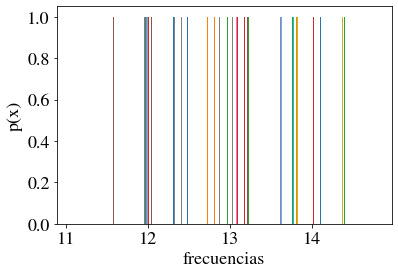

In [ ]:
from sklearn.datasets import load_wine # Base de datos de cancer de seno
import pandas as pd
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

datos = load_wine()
data = datos.data
X = data[:,0]
nombres = ['fixed acidity']
data_comp = pd.DataFrame(X, columns = nombres)
display(data_comp)
data_comp.describe()

pyplot.hist(data_comp)
pyplot.xlabel('frecuencias')
pyplot.ylabel('p(x)')
pyplot.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
x = X.reshape (-1,1)

SS = StandardScaler()
SS.fit(x)

X_N = SS.transform(x) # Se recomienda normalizar los datos basado en la media y la desviación estándar
X_N = X_N.flatten()
display(X_N)

array([ 1.51861254,  0.24628963,  0.19687903,  1.69154964,  0.29570023,
        1.48155459,  1.71625494,  1.3086175 ,  2.25977152,  1.0615645 ,
        1.3580281 ,  1.38273339,  0.92568536,  2.16095032,  1.70390229,
        0.77745356,  1.60508109,  1.02450655,  1.46920194,  0.78980621,
        1.3086175 , -0.08723191,  0.87627476, -0.18605311,  0.61686912,
        0.06099988,  0.48098997,  0.36981612,  1.07391715,  1.2592069 ,
        0.90098006,  0.71569031,  0.83921681,  0.93803801,  0.62922177,
        0.59216382,  0.34511082,  0.06099988,  0.08570518,  1.50625989,
        0.69098501,  0.50569527,  1.0862698 ,  0.29570023,  0.06099988,
        1.49390724,  1.70390229,  1.1109751 ,  1.3580281 ,  1.1603857 ,
        0.06099988,  1.02450655,  1.01215391,  0.95039066,  0.91333271,
        0.69098501,  1.50625989,  0.35746347,  0.88862741, -0.77898029,
       -0.82839089, -0.44545875,  0.82686416, -0.77898029, -1.02603329,
       -0.77898029,  0.13511578, -0.77898029,  0.41922672, -0.97

In [ ]:
import scipy.stats
import numpy as np

nombres = ['beta', 'gamma', 'expon', 'chi2', 'norm', 't', 'uniform', 'lognorm', 'pearson3']
ks_valor = []
p_valor = []

for distribuciones in nombres:
    dis = getattr(scipy.stats, distribuciones)
    par = dis.fit(X_N)
    D, p = scipy.stats.kstest(X_N, distribuciones, args = par)
    p = np.around(p, 5)
    D = np.around(D, 5)
    p_valor.append(p)
    ks_valor.append(D)

resultados = pd.DataFrame()
resultados['Distribución'] = nombres
resultados['KS_valor'] = ks_valor
resultados['Valor p'] = p_valor
resultados.sort_values(['Valor p'], ascending=True, inplace=True)

print("Distribuciones organizados por pvalue KS")
print(resultados)

Distribuciones organizados por pvalue KS
  Distribución  KS_valor  Valor p
2        expon   0.28200  0.00000
8     pearson3   0.99107  0.00000
6      uniform   0.14852  0.00068
3         chi2   0.07522  0.25378
4         norm   0.06854  0.35890
5            t   0.06851  0.35941
7      lognorm   0.06841  0.36126
1        gamma   0.06749  0.37801
0         beta   0.04946  0.77653


Para $p < 0.05$, los datos tienen una distribución exponencial, pearson 3 u uniforme, lo cual se acepta la hipótesis nula que los datos tienen una distribución uniforme.

Ahora veamos la prueba KS con dos muestras

In [ ]:
from sklearn.datasets import load_wine # Base de datos de cancer de seno
import pandas as pd

datos = load_wine()
data = datos.data
X2 = data[:,0:2]
nombres = ['fixed acidity', 'volatile acidity']
data_comp = pd.DataFrame(X2, columns = nombres)
display(data_comp)

,fixed acidity,volatile acidity
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [ ]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(X2)
X_2 = SS.transform(X2) # Se recomienda normalizar los datos basado en la media y la desviación estándar
display(X_2)

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

In [ ]:
import scipy.stats
import numpy as np

D, p = scipy.stats.ks_2samp(X_2[:,0], X_2[:,1])
print("KS_valor: {:.5f}".format(D))
print("Valor P: {:.5f}".format(p))

KS_valor: 0.16854
Valor P: 0.01262


Considerando que ambas muestras tienen una misma distribución, si $Valor_p$ es alto, entonces no se rechaza la hipótesis nula que las distribuciones de dos muestras son las mismas. Si hacemos más exigencia con $p < 0.05$, se cumple lo anterior.

## Mejora 1 del test KS: El test de Lilliefors

El test de Lilliefors está basado en el test KS, el cual cuantifica una distancia entre una función de distribución empírica de la muestra y la función de distribución acumulativa de una distribución de referencia o entre dos funciones de distribución empíricas de dos muestras. 

La hipótesis nula del test es que los datos tenga una distribución exponencial y la hipótesis alternativa es que puede ser otro tipo de distribución.

Este tipo de test es recomendable para conjunto de datos grandes y realiza muchas simulaciones (alrededor de 10000) para tener una mayor certeza del valor p.

Veamos un ejemplo práctico de este tipo de test

In [ ]:
from statsmodels.stats.diagnostic import lilliefors # test de Lilliefors
from sklearn.datasets import fetch_california_housing # base de datos

datos = fetch_california_housing()
data = datos.data
X3 = data[:,0]
nombres = ['MedInc']
data_comp = pd.DataFrame(X3, columns = nombres)
display(data_comp)

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [ ]:
from sklearn.preprocessing import StandardScaler

X3 = X3.reshape(-1, 1)
SS = StandardScaler()
SS.fit(X3)
X_3 = SS.transform(X3) # Se recomienda normalizar los datos basado en la media y la desviación estándar
X_3 = X_3.flatten()

nombres = ['norm', 'exp']
li_valor = []
p_valor = []

for distribuciones in nombres:
    D, p = lilliefors(X_3, distribuciones, pvalmethod = 'approx')
    p = np.around(p, 5)
    D = np.around(D, 5)
    p_valor.append(p)
    li_valor.append(D)

resultados = pd.DataFrame()
resultados['Distribución'] = nombres
resultados['Li_valor'] = li_valor
resultados['Valor p'] = p_valor
resultados.sort_values(['Valor p'], ascending=True, inplace=True)

print("Distribuciones organizados por pvalue test de Lilliefors")
print(resultados)

Distribuciones organizados por pvalue test de Lilliefors
  Distribución  Li_valor  Valor p
0         norm   0.08943     0.00
1          exp   0.58159     0.01


Observen que el valor del test para una distribución normal o Gaussiana es menor con respecto a la distribución exponencial. En la distribución normal, como $Li_{valor}$ es muy pequeño entonces no se rechaza la hipótesis nula que los datos tenga una distribución normal. En cambio, con la distribución exponencial, como $Li_{valor}$ es mucho mayor que en la distribución normal, entonces se rechaza la hipótesis nula que las datos tenga una distribución exponencial.

## Mejora 2 del test KS: El test de Shapiro–Wilk o test W

El test W es una variante del test KS que depende de la matriz de covarianza entre el orden estadístico de las muestras u observaciones. Este tipo de test se recomienda para datos de pocas o de muchas muestras.

Veamos un ejemplo práctico del test W.


In [ ]:
from sklearn.datasets import load_wine

datos = load_wine()
data = datos.data
X = data[:,0]

In [ ]:
from sklearn.preprocessing import StandardScaler

X4 = X.reshape(-1, 1)
SS = StandardScaler()
SS.fit(X4)
X_4 = SS.transform(X4) # Se recomienda normalizar los datos basado en la media y la desviación estándar
X_4 = X_4.flatten()

In [ ]:
from scipy.stats import shapiro 

D,p = shapiro(X_4) # Se asume una distribución normal

print("El valor w es = {:.5f}".format(D))
print("El valor p es = {:.5f}".format(p))

El valor w es = 0.98180
El valor p es = 0.02005


Observen que el valor p es menor a 0.05, lo cual se acepta la hipótesis nula que los datos tienen una distribución normal.

# ANOVA

ANOVA o análisis de varianza es un modelo que permite evaluar la influencia de dos o más variables independientes con respecto a una variable dependiente, por medio de un **test de diferencias entre varianzas** (e inclusive entre medias). Tales diferencias se comparan en término de una métrica del error que es atribuible a una variación en las variables dependientes dentro una condición que permite saber que proporción de la variación de una variable dependiente puede atribuirse a la manipulación de las variables de un experimento, de un sistema real, etc. 

A continuación, enfocaremos el modelo ANOVA en dos partes: *modelos de un factor* y *modelos de múltiples factores*

## Modelos de un factor:

En este modelo, también llamado ANOVA estándar, definimos un parámetro llamado **número de niveles**, $p$, tal que $y_{k,l}$ es el valor observable definido como una variable dependiente (función de pronóstico):

$$y_{k,l} = \mu + \alpha_l + \epsilon_{k,l}$$

donde:

*   $\mu$ es un valor constante que representa el punto de corte con el eje $y$. 
*   $l$ es la etiqueta en el cual indica el nivel del factor, siendo $l = \lbrace 1,\ldots, p \rbrace$
*   $k$ es la $k$-enésima prueba o test, siendo $k = \lbrace 1, \ldots, n_l\rbrace$ y $n_l$ es el número de tratamientos o pruebas para un nivel de factor $l$.
*   $\alpha_l$ es el efecto del $l$-enésimo nivel que varia la prueba o tratamiento.  
*   $\epsilon_{k,l}$ es una variable independiente y aleatoria que adiciona un margen de error entre un valor predicho y un valor conocido u observable. 

Si $\epsilon_{k,l} = 0$ entonces $l = 0$ y por consiguiente se obtiene una función de pronóstico llamado **media de la prueba o tratamiento:**

$$y_{k} = \mu + \alpha_l$$

Si $y_{k,l} = y_k + \epsilon_{k,l}$, donde asumimos que los valores predichos de $y_{k,l}$ tendrá un margen de error $\epsilon_{k,l}$, se puede afirmar que la ecuación $y_{k} = \mu + \alpha_l$ se puede reescribir como:

$$y_{k,l} -\epsilon_{k,l} = y_k + \epsilon_{k,l} - \hat{y}$$

donde $\hat{y}$ es la media general de los valores predichos. Como ANOVA analiza variaciones de varianza, se puede escribir la anterior ecuación como:

$$\sum_k \sum_l (y_{k,l} -\hat{y})^2 = \sum_k \sum_l (y_{k,l} - y_k)^2 + N\sum_k (y_{k} - \hat{y})^2$$

donde:

*   $S_{r} = N\sum_k (y_{k} - \hat{y})^2$ es una métrica que mide la variación debida *al nivel de factor* (error de regresión de cuadrados).
*   $S_{e} = \sum_k \sum_l (y_{k,l} - y_k)^2$ es una métrica que relaciona la varianza dentro de *cada* factor (error de cuadrados).

De esta manera, la **varianza total**, $S_{t} = S_{r} + S_{e}$. A partir de $S{r}$ y $S_{e}$, se puede establecer varias medidas que nos permitirá analizar si se acepta o no una hipótesis nula. Una de las medidas es el **F-distribución**, dado por una razón entre $S{r}$ y $S_{e}$:

$$F_{distribucion} = \frac{S_{r}/(p - 1)}{S_{e}/(n_{l} - p)}$$

Si $F_{distribucion}$ es un valor grande, entonces hay mayor probabilidad que se acepte la hipótesis nula. Para encontrar $p_{value}$ que permite aceptar o rechazar la hipótesis nula, se puede usar la métrica $F_{distribucion}$ con $p-1$ y $n_{l} - 1$. 

Por otra parte, una característica importante del modelo de un factor es identificar $\mu$ principal que representará la media de $y$. Lo anterior se logra si $\sum_{l=1}^p \alpha_l = 0$, imponiendo una restricción del modelo. Esta estrategía permite trabajar con datos de diferentes tamaños (número de muestras u observaciones) por cada nivel del factor $l$.

*Por ejemplo*, si asumimos que el número de niveles $p = 3$, la función de pronóstico tendrá una forma general definido como un *modelo lineal* con tres variables independientes:

$$y_i = \mu + \alpha_1 x_{i,l} + \alpha_2 x_{i,2} + \alpha_3 x_{i,3} + \epsilon_i$$

donde $x_{i,l}$ es igual a 1 o 0 de acuerdo a las $i$-enésimas obervaciones o muestras que **si** pertenecen a un nivel $l$ y a las  $i$-enésimas obervaciones o muestras que **no** pertenecen a un nivel $l$. Para facilitar el ejemplo, asumimos para todas las observaciones que $n_1 = n_2 = n_3 = 2$, el cual utilizaremos una notación especial llamado $\beta$ o **estimador de minimos cuadrados**, que para el ejemplo será $\beta = (\mu, \alpha_1, \alpha_2, \alpha_3)^T$. Por tanto, nosotros podemos expresar la función de pronóstico de forma general como:

$$y = \chi\beta + \epsilon$$

donde $\chi$ se llama **matriz de diseño**. Para $p=3$ y $n_1 = n_2 = n_3 = 2$, la matriz está dado por:

$\chi = \begin{bmatrix} 1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 0 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1 \end{bmatrix}$

En esta matriz, si se suma cada fila siempre será $2$ pero no será invertible, es decir, $\chi^T\chi$. Una forma de superar este problema es cambiar la codificación $\chi$ introduciendo una restricción adicional que permita que   $\sum_{l=1}^p \alpha_l = 0$. Para este caso, se puede asumir que $\alpha_3 = -\alpha_1 - \alpha_2 = -(\alpha_1 + \alpha_2)$, lo cual evita la introducción de $\alpha_3$ explicitamente en el modelo:

$$y_i = \mu + \alpha_1 x_{i,l} + \alpha_2 x_{i,2} + \epsilon_i$$

Obviamente, $\beta = (\mu, \alpha_1, \alpha_2)^T$ y por cosnsiguiente, $chi$ tendrá *un nuevo diseño:*

$\chi = \begin{bmatrix} 1 & 1 & 0 \\
1 & 1 & 0\\
1 & 0 & 1\\
1 & 0 & 1\\
1 & -1 & -1\\
1 & -1 & -1 \end{bmatrix}$

De esta manera, $\chi^T \chi$ es invertible y por consiguiente, se puede computar $\beta$ como:

$$\beta = (\chi^T\chi)^{-1}\chi^T$$

$\beta$ puede ser probado al usar cualquier técnica de prueba de hipótesis visto en anteriores secciones.

Veamos un ejemplo práctico del modelo de un factor

In [ ]:
!pip install scikit-learn --upgrade # Antes de empezar, se recomienda actualizar scikit-learn
!pip install statsmodels --upgrade # Antes de empezar, se recomienda actualizar statsmodels

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)
Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.11.1)


In [ ]:
from sklearn.datasets import load_wine # Base de datos de clases de vino
import pandas as pd # Dataframe
import numpy as np

datos = load_wine()
data = datos.data
X = data[:,[0,1,2]]
data_nominal = datos.target
Y = data_nominal
DATA = np.vstack((X.T,Y.T))
nombres = ['fixed acidity', 'volatile acidity', 'citric acid', 'clases']
data_comp = pd.DataFrame(DATA.T, columns = nombres)
print("Tamaño de los datos = {:d} muestras y {:d} variables o características".format(DATA.T.shape[0], DATA.T.shape[1]))
display(data_comp)

Tamaño de los datos = 178 muestras y 4 variables o características


,fixed acidity,volatile acidity,citric acid,clases
0,14.23,1.71,2.43,0.0
1,13.20,1.78,2.14,0.0
2,13.16,2.36,2.67,0.0
3,14.37,1.95,2.50,0.0
4,13.24,2.59,2.87,0.0
...,...,...,...,...
173,13.71,5.65,2.45,2.0
174,13.40,3.91,2.48,2.0
175,13.27,4.28,2.26,2.0
176,13.17,2.59,2.37,2.0


In [ ]:
from scipy.stats import f_oneway # Modelo de un factor ANOVA

f_valores, p_valor = f_oneway(data_comp['fixed acidity'], data_comp['volatile acidity'], data_comp['citric acid'], data_comp['clases'])
print("F_value = {:.3f} y p_value = {:.3f}".format(f_valores,p_valor))

F_value = 8643.998 y p_value = 0.000


In [ ]:
import statsmodels.api as sm # Librería que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes.
from statsmodels.formula.api import ols # Modelo de cuadrados mínimos ordinarios

# Se realiza un ajuste del tamaño de los datos para que se adecuen a la condiciones de la librería statsmodels
d_datos = pd.melt(data_comp.reset_index(), id_vars=['index'], value_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'clases'])
d_datos.columns = ['índice', 'Pruebas', 'Valor']
model_OLS = ols('Valor ~ C(Pruebas)', data = d_datos).fit()
tabla_ANOVA = sm.stats.anova_lm(model_OLS , typ = 1) # Cada typ = 1, 2 o 3, permite analizar varios estadísticos de la prueba ANOVA. Por defecto, typ = 2
tabla_ANOVA
# df = Grados de libertad en términos del modelo.
# F = Valores estadísticos relevantes del modelo,
# sum_sq = suma de cuadrados del modelo,
# PR(>F) = p-value

,df,sum_sq,mean_sq,F,PR(>F)
C(Pruebas),3.0,16745.725250,5581.908417,8643.99804,0.0
Residual,708.0,457.194824,0.645755,NaN,NaN


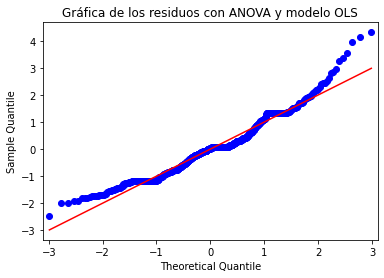

In [ ]:
from matplotlib import pyplot

residuos = model_OLS.resid  # Se extrae los residuos del modelo OLS

fig = sm.qqplot(residuos, fit = True, line='s')
pyplot.xlabel('Theoretical Quantile') # Etiqueta del eje x
pyplot.ylabel('Sample Quantile') # Etiqueta del eje y  
pyplot.title('Gráfica de los residuos con ANOVA y modelo OLS') # Titulo de la gráfica
pyplot.show()

Observen que PR(>F) nos genera un valor por debajo de 0.05, lo cual significa que hay diferencias significativas entre pruebas o tratamientos.

Analizando el ejemplo anterior, el test ANOVA permite establecer las diferencias de tratamiento o prueba que sean estadísticamente significativos. Sin embargo, uno de los problemas del modelo de un factor es que no considera que pruebas o tratamientos son más significativos entre sí. Para resolver este tipo de inconveniente, se utiliza *comparadores de pares múltiples*, que nos ayudará a resolver este tipo de limitante. Para el ejemplo anterior, usaremos el **test Tukey HSD o Tukey-Kramer o diferencia significativa honesta**. 

El test Turkey HSD es un modelo que busca la diferencia significativa entre dos conjuntos de datos que sean estadísticamente relevantes si hay una alta probabilidad que un cambio numérico observado en un valor esté realacionado causalmente por un cambio observado en otro valor. Matemáticamente, este test se calcula como:

$$p_{tukey} = \frac{x_i - x_j}{\sqrt{2\frac{S_r}{N}}}$$

donde $x_i$ y $x_j$ son dos vectores de datos de tamaño 1xN, siendo $N$ el tamaño de las muestras y $S_r$ es el error cuadrático calculado desde un modelo ANOVA.

In [ ]:
!pip install pingouin --upgrade # Antes de empezar, se recomienda actualizar pingouin
# Pingouin es una librería estadística basado en Pandas y Numpy que contiene test de pruebas de hipótesis interesantes.

     |████████████████████████████████| 225kB 5.0MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.6-cp36-none-any.whl size=217880 sha256=c7a8851862babc9ce0bf7819e4805ebd5cbd517de053e8db3c79c90f25fbeadd
  Stored in directory: /root/.cache/pip/wheels/0f/12/3e/c50f18f38eaf437b927b567ac6615215fdf75fe58890d32276
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4962 sha256=d4eaa1ad1642f8f9d20a45c83a385fd88e402c22fb337cf60cdbdeb9895212fd
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7049 sha256=96fe4d70b56abed7fe8ec7276779f43daf43ea470adba5e5bfa12a66c7e8f528
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [ ]:
from pingouin import pairwise_tukey # test Tukey HSD

Comparador = pairwise_tukey(data = d_datos, dv = 'Valor', between = 'Pruebas', alpha = 0.05)
print("Resultados del test Tukey HSD: \n", Comparador)

# A y B son dos características de los datos
# mean(A) es la media de la característica A
# T es un valor de significado estadístico.
# p-tukey es valor del significado estadístico según Tukey HSD
# hedge es el efecto del tamaño de los datos (dependiendo si los datos son balanceados o no son balanceados)

Resultados del test Tukey HSD: 
                A                 B    mean(A)  ...           T  p-tukey     hedges
0    citric acid            clases   2.366517  ...   16.768139    0.001   1.773651
1    citric acid     fixed acidity   2.366517  ... -124.842301    0.001 -13.205201
2    citric acid  volatile acidity   2.366517  ...    0.354173    0.900   0.037463
3         clases     fixed acidity   0.938202  ... -141.610440    0.001 -14.978852
4         clases  volatile acidity   0.938202  ...  -16.413966    0.001  -1.736188
5  fixed acidity  volatile acidity  13.000618  ...  125.196474    0.001  13.242664

[6 rows x 10 columns]


Observen que el único caso donde p-tukey es mayor a 0.05 es en la prueba 2, es un valor 0.9. Sin embargo, para las demás pruebas se genera un valor por debajo de 0.01, lo cual se rechaza la hipótesis nula y por consiguiente, esas combinaciones entre características tienen diferencias estadísticas significativas.

**COMPLEMENTO:** Nosotros podemos utilizar la librería pingouin para hacer una análisis anova. A diferencia de la librería sm.stats.anova_lm, reporta una métrica adicional llamada $np^2$ o **cuadrado eta parcial**, el cual considera como métrica por defecto del efecto del tamaño $\alpha$, mencionado en la teoría del análisis ANOVA.

$$np^2 = \frac{S_{r}}{S_r + S_e}$$

Para que la hipótesis nula sea rechazada y que las combinaciones entre características tengan diferencias estadísticamente significativas, $np^2$ debe ser cercano a 1.

Observen el siguiente ejemplo práctico:

In [ ]:
from pingouin import anova # ANOVA

anovita = anova(dv='Valor', between='Pruebas', data = d_datos, detailed = True)
anovita

,Source,SS,DF,MS,F,p-unc,np2
0,Pruebas,16745.725250,3,5581.908417,8643.99804,0.0,0.973423
1,Within,457.194824,708,0.645755,NaN,NaN,NaN


## Modelos de múltiples factores

En los modelos de múltiples factores, $\chi$ se puede extender de una manera general a muchas situaciones con muchas variables cualitativas o más características, permitiendo la posibilidad de interactuar entre dos o más factores. Por ejemplo, consideremos dos factores del modelo ANOVA tradicional:

$$y_{i,j,k} = \mu + \alpha_i + \gamma_j + (\alpha\gamma)_{i,j} + \epsilon_{i,j,k}$$

donde $i = \lbrace 1,\ldots, r \rbrace$, $j = \lbrace 1,\ldots, s \rbrace$, $k = \lbrace 1,\ldots, n_{i,j} \rbrace$, $r$ es el número de niveles de un factor, $A$, $s$ es el número de niveles de un factor, $B$, $\alpha_i$ es es el efecto del i-enésimo nivel que varia la prueba o tratamiento de $A$ y $\alpha_j$ es es el efecto del i-enésimo nivel que varia la prueba o tratamiento de $B$.

Como se considera dos factores, *por ejemplo*, se puede organizar en una tabla de AxB:

|      |$B_1$ |$B_2$ |
|------|------|------|
|$A_1$ | 18 | 15 |
||------|------|
||15|20|
||------|------|
|||25|
||------|------|
|||30|
|------|------|------|
|$A_2$ | 5 | 10 |
||------|------|
||8|12|
||------|------|
||8||
|------|------|------|
|$A_3$ | 10 | 20 |
||------|------|
||14|25|
||------|------|

En la anterior tabla ejemplo, hay dos factores, $A$ y $B$, donde $r = 3$ y $s = 2$. Las mediciones de $\alpha$ tiene tres niveles que miden diferentes efectos en $A$ y $\gamma$ tiene dos niveles que mide los efectos en $B$. 

Considerando el ejemplo anterior, $y_{i,j,k}$ está sujeto a tres restricciones:

*Restricción 1:*

$$\sum_{i=1}^r \alpha_i = 0;\,\,\, \sum_{j=1}^s \gamma_j = 0$$

*Restricción 2:*

$$\sum_{i=1}^r (\alpha\gamma)_{i,j} = 0;\,\,\, Si\,\, j = \lbrace 1,\ldots, s \rbrace$$

*Restricción 3:*

$$\sum_{j=1}^s (\alpha\gamma)_{i,j} = 0;\,\,\, Si\,\, i = \lbrace 1,\ldots, r \rbrace$$

Como pueden observar, las restricciones 2 y 3 muestran las *interacciones entre efectos* , lo cual se debe considerar para obtener una matriz de diseño $\chi$ que se ajuste a tales restricciones. Existen dos estrategías: sin considerar restricciones y considerando las restricciones. Las soluciones que genera ambos casos no son tan triviales, por lo cual, se requiere del uso de una solución de mínimos cuadrados como el modelo de un factor ANOVA.

Veamos un ejemplo práctico del modelo con dos factores.





In [ ]:
from pingouin import anova # ANOVA
from pingouin import read_dataset # bases de datos para prueba anova

datos = read_dataset('anova2')
datos

,Ss,Blend,Crop,Yield
0,1,Blend X,Wheat,123
1,2,Blend X,Wheat,156
2,3,Blend X,Wheat,112
3,4,Blend X,Wheat,100
4,5,Blend X,Corn,128
5,6,Blend X,Corn,150
6,7,Blend X,Corn,174
7,8,Blend X,Corn,116
8,9,Blend X,Soy,166
9,10,Blend X,Soy,178


In [ ]:
anovita_2_factors = datos.anova(dv = 'Yield', between = ['Blend', 'Crop']).round(3)
anovita_2_factors

,Source,SS,DF,MS,F,p-unc,np2
0,Blend,2.042,1,2.042,0.004,0.952,0.000
1,Crop,2736.583,2,1368.292,2.525,0.108,0.219
2,Blend * Crop,2360.083,2,1180.042,2.178,0.142,0.195
3,Residual,9753.250,18,541.847,NaN,NaN,NaN


Observen que (p-unc) no se puede rechazar la hipótesis nula en ninguna de las variables porque p > 0.05 y por consiguiente, las variables no son estadísticamente significativos. 